Final Version of mini-project

# Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# for feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# building models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# ML pipeline
from sklearn.pipeline import Pipeline

# Validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, mean_absolute_error

# 2021 FIES dataset

In [ ]:
fies_2021_path = "2021_FIES.csv"
df_21 = pd.read_csv(fies_2021_path)

In [ ]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQUENCE_NO                   165029 non-null  int64  
 3   FSIZE                         165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

In [ ]:
df_21.head(5)

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,URB,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC
0,1,28,1,6.5,290000,0,290000,0,0,340000,...,2,2800,217,100.768,103.1817,106.2332,107683.08,8.0,8.0,7.0
1,1,28,2,4.0,80000,72000,152000,20500,60000,32500,...,2,2800,217,100.768,103.1817,106.2332,81202.50,7.0,7.0,6.0
2,1,28,3,1.0,0,0,0,0,30000,81000,...,2,2800,217,100.768,103.1817,106.2332,190061.00,10.0,10.0,9.0
3,1,28,4,3.0,0,0,0,8700,170000,0,...,2,2800,217,100.768,103.1817,106.2332,71235.00,7.0,7.0,5.0
4,1,28,5,4.0,12000,80400,92400,250,30000,0,...,2,2800,217,100.768,103.1817,106.2332,68072.50,6.0,6.0,4.0


## Check for missing data

In [ ]:
missing_data = df_21.isnull()

# Run for loop to check for missing values
for column in missing_data.columns.values.tolist():
    print(f"{column}\t{missing_data[column].value_counts()}")
    print("")

W_REGN	False    165029
Name: W_REGN, dtype: int64

W_PROV	False    165029
Name: W_PROV, dtype: int64

SEQUENCE_NO	False    165029
Name: SEQUENCE_NO, dtype: int64

FSIZE	False    165029
Name: FSIZE, dtype: int64

REG_SAL	False    165029
Name: REG_SAL, dtype: int64

SEASON_SAL	False    165029
Name: SEASON_SAL, dtype: int64

WAGES	False    165029
Name: WAGES, dtype: int64

NETSHARE	False    165029
Name: NETSHARE, dtype: int64

CASH_ABROAD	False    165029
Name: CASH_ABROAD, dtype: int64

CASH_DOMESTIC	False    165029
Name: CASH_DOMESTIC, dtype: int64

RENTALS_REC	False    165029
Name: RENTALS_REC, dtype: int64

INTEREST	False    165029
Name: INTEREST, dtype: int64

PENSION	False    165029
Name: PENSION, dtype: int64

DIVIDENDS	False    165029
Name: DIVIDENDS, dtype: int64

OTHER_SOURCE	False    165029
Name: OTHER_SOURCE, dtype: int64

NET_RECEIPT	False    165029
Name: NET_RECEIPT, dtype: int64

REGFT	False    165029
Name: REGFT, dtype: int64

NET_CFG	False    165029
Name: NET_CFG, dtype: i

## Summary statistics for 2021 data

In [ ]:
df_21.describe(include = 'all')

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,URB,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC
count,165029.000000,165029.000000,165029.000000,165029.000000,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,...,165029.000000,165029.000000,165029.000000,165029.000000,165029.000000,165029.000000,1.650290e+05,165029.000000,165029.000000,165029.000000
mean,9.273200,45.657212,82515.000000,4.244409,1.253006e+05,2.510955e+04,1.504101e+05,1.808755e+03,2.001754e+04,1.671844e+04,...,1.520072,4568.173703,386.174781,139.465050,159.956529,157.993903,8.185092e+04,5.290725,5.531791,5.491483
std,4.701484,24.885794,47639.913124,2.029229,2.053604e+05,4.793015e+04,2.074431e+05,1.488686e+04,7.752000e+04,3.150117e+04,...,0.499598,2488.661688,448.857771,137.526097,153.629657,149.124832,1.010066e+05,2.897115,2.881691,2.871011
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,100.000000,1.000000,4.333000,4.863000,5.297600,5.408625e+03,1.000000,1.000000,1.000000
25%,5.000000,24.000000,41258.000000,3.000000,0.000000e+00,0.000000e+00,2.160000e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,2402.000000,102.000000,54.716000,65.901200,65.395900,3.540300e+04,3.000000,3.000000,3.000000
50%,10.000000,45.000000,82515.000000,4.000000,5.600000e+04,0.000000e+00,9.300000e+04,0.000000e+00,0.000000e+00,8.000000e+03,...,2.000000,4501.000000,239.000000,93.000000,110.720700,109.514900,5.543200e+04,5.000000,6.000000,5.000000
75%,13.000000,70.000000,123772.000000,5.500000,1.654000e+05,3.600000e+04,1.919000e+05,0.000000e+00,2.000000e+03,2.160000e+04,...,2.000000,7000.000000,478.000000,164.136000,186.286800,186.521900,9.400000e+04,8.000000,8.000000,8.000000
max,17.000000,98.000000,165029.000000,23.000000,6.821000e+06,4.290000e+06,6.821000e+06,3.901650e+06,5.130000e+06,3.000000e+06,...,2.000000,9804.000000,3086.000000,3260.250000,3950.610000,4029.511900,9.691285e+06,10.000000,10.000000,10.000000


# Data Preprocessing

## Classifying total income based on avg total income of dataset

- used the median value for the average of the total income due to the presence of outliers in the data

In [ ]:
# add another column named 'income_status' containing values 1 and 0 where 1 is when the total income is above the median value, and 0 if it is below or equal to the median value.
  
df_21['income_status'] = np.where(df_21['TOINC'] > df_21['TOINC'].median(), 1, 0)
df_21.head()

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC,income_status
0,1,28,1,6.5,290000,0,290000,0,0,340000,...,2800,217,100.768,103.1817,106.2332,107683.08,8.0,8.0,7.0,1
1,1,28,2,4.0,80000,72000,152000,20500,60000,32500,...,2800,217,100.768,103.1817,106.2332,81202.50,7.0,7.0,6.0,1
2,1,28,3,1.0,0,0,0,0,30000,81000,...,2800,217,100.768,103.1817,106.2332,190061.00,10.0,10.0,9.0,0
3,1,28,4,3.0,0,0,0,8700,170000,0,...,2800,217,100.768,103.1817,106.2332,71235.00,7.0,7.0,5.0,1
4,1,28,5,4.0,12000,80400,92400,250,30000,0,...,2800,217,100.768,103.1817,106.2332,68072.50,6.0,6.0,4.0,1


## Converting categorical values to numerical values using One-hot encoder 
- used to convert categorical values to numerical values
- converted the columns of Region and Province

In [ ]:
# converting nominal values to numerical values
# columns of region and province are changed
ohe_df = pd.get_dummies(df_21, columns = ['W_REGN','W_PROV'], prefix = ['REG','PROV'])
ohe_df

,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,...,PROV_78,PROV_79,PROV_80,PROV_81,PROV_82,PROV_83,PROV_85,PROV_86,PROV_97,PROV_98
0,1,6.5,290000,0,290000,0,0,340000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4.0,80000,72000,152000,20500,60000,32500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,0,0,0,0,30000,81000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.0,0,0,0,8700,170000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4.0,12000,80400,92400,250,30000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165024,165025,1.0,0,0,0,0,26000,4200,0,0,...,0,0,0,0,0,0,0,0,0,0
165025,165026,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165026,165027,3.0,55050,54900,109950,0,0,15500,0,0,...,0,0,0,0,0,0,0,0,0,0
165027,165028,8.0,0,3600,3600,0,5000,37800,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data into features and target labels

### Target Label

In [ ]:
# target_21 contains the income_status as the target feature
target_21 = ohe_df['income_status']
target_21

0         1
1         1
2         0
3         1
4         1
         ..
165024    0
165025    0
165026    0
165027    0
165028    0
Name: income_status, Length: 165029, dtype: int32

### Expenditure Features only
- A subset of the 2021 dataset will be made to include only the different types of expenditures along with the target variable
- contains 35 Expenditure variables

In [ ]:
# list containing all expenditures from the 2021 dataset 
exp_list = [
'BREAD',
'MEAT',
'FISH',
'MILK',
'OIL',
'FRUIT',
'SUGAR',
'FOOD_NEC',
'FRUIT_VEG',
'COFFEE',
'TEA',
'COCOA',
'SOFTDRINKS',
'OTHER_NON_ALCOHOL',
'ALCOHOL',
'TOBACCO',
'OTHER_VEG',
'SERVICES_PRIMARY_GOODS',
'ALCOHOL_PROCDUCTION_SERVICES',
'CLOTH',
'FURNISHING',
'HEALTH',
'HOUSING_WATER',
'ACTRENT',
'RENTVAL',
'TRANSPORT',
'COMMUNICATION',
'RECREATION',
'EDUCATION',
'MISCELLANEOUS',
'INSURANCE',
'DURABLE',
'OCCASION',
'OTHER_EXPENDITURE',
'FOOD_ACCOM_SRVC',
]

# create a dataframe only for expenditures
exp_df = ohe_df[exp_list].copy()
exp_df

,BREAD,MEAT,FISH,MILK,OIL,FRUIT,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,...,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,MISCELLANEOUS,INSURANCE,DURABLE,OCCASION,OTHER_EXPENDITURE,FOOD_ACCOM_SRVC
0,37359,43748,15988,12146,3445,8450,3171,4452,9440,2306,...,19140,16794,2849,12000,12264,12000,0,5000,650,0
1,22820,25551,10878,3690,1230,4500,1460,3261,2652,4380,...,7860,11274,250,200,6504,9000,0,2500,700,0
2,9321,10740,7268,1590,1545,2845,2060,2337,2652,1473,...,780,9594,0,0,3240,0,0,0,100,0
3,16770,16100,6232,2520,1840,3380,720,2810,2600,1346,...,6900,3000,0,0,8268,2352,7000,3500,0,0
4,23325,23171,8812,2790,1840,3320,648,2835,1040,728,...,5460,3000,60,0,5208,3600,70000,0,450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165024,6587,934,2704,1242,360,980,1452,435,0,264,...,600,0,0,0,1554,0,0,0,3600,0
165025,24915,2511,26684,2388,720,1480,882,1093,0,996,...,8700,2400,505,0,4512,0,3000,0,4520,0
165026,14806,2028,4566,2910,720,1440,843,929,0,1126,...,1920,978,0,0,3246,0,8000,9000,3500,0
165027,34016,2619,17686,1366,720,2205,1978,1122,0,1288,...,4470,2280,962,0,6264,0,1480,0,3976,0


### All features

In [ ]:
# features_21 contains all the features except for the target features
features_21 = ohe_df.drop(['TOINC', 'income_status'], axis=1)

# Feature Importance using Principal Component Analysis (PCA)
PCA is used to reduce the number of variables we will use to train the model; in this study, we will also implement it with varying explained variance from 60%, 70%, 80%, 90%, and 95%

we will also plot the Principal Components and their corresponding explained variance

the top 15 most important features in each component is also presented for both the expenditure features, and all features

In [ ]:
# functions to determine the most important features in each component

# pca function
def pca(components, X, df):
    # scale X
    sc = StandardScaler()
    sc.fit(X)
    X = sc.transform(X)

    pca = PCA(n_components = components)
    x_new = pca.fit_transform(X)
    num_components = len(pca.explained_variance_ratio_)
    print(f'Components: {num_components} out of {len(df.columns)} ({num_components/(len(df.columns)-1) * 100}%)')
    return x_new, pca, num_components

# prints the top 15 most important features (in decreasing order) in each PCA component
def feature_importance_pca_components(pca, df):
    pca_components = abs(pca.components_)
    print('Top 15 most important features in each component')
    print('===============================================')
    for row in range(pca_components.shape[0]):
        # get the indices of the top 15 values in each row
        temp = np.argpartition(-(pca_components[row]), 15)

        # sort the indices in descending order
        indices = temp[np.argsort((-pca_components[row])[temp])][:15]

        # print the top 15 feature names
        print(f'Component {row}: {df.columns[indices].to_list()}')

# plots the PC index with its corresponding explained variance ratio
def plot_pca(pca):
    cum_var = np.cumsum(pca.explained_variance_ratio_ * 100)
    indiv_var = pca.explained_variance_ratio_ * 100

    plt.figure(figsize=(20,12))
    plt.bar(range(0,len(indiv_var)), indiv_var, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_var)), cum_var, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.title('Explained variance Ratio VS Principal Component Index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()        

## on Expenditure Features only

### PCA with explained variance of 60%

Components: 14 out of 35 (41.17647058823529%)


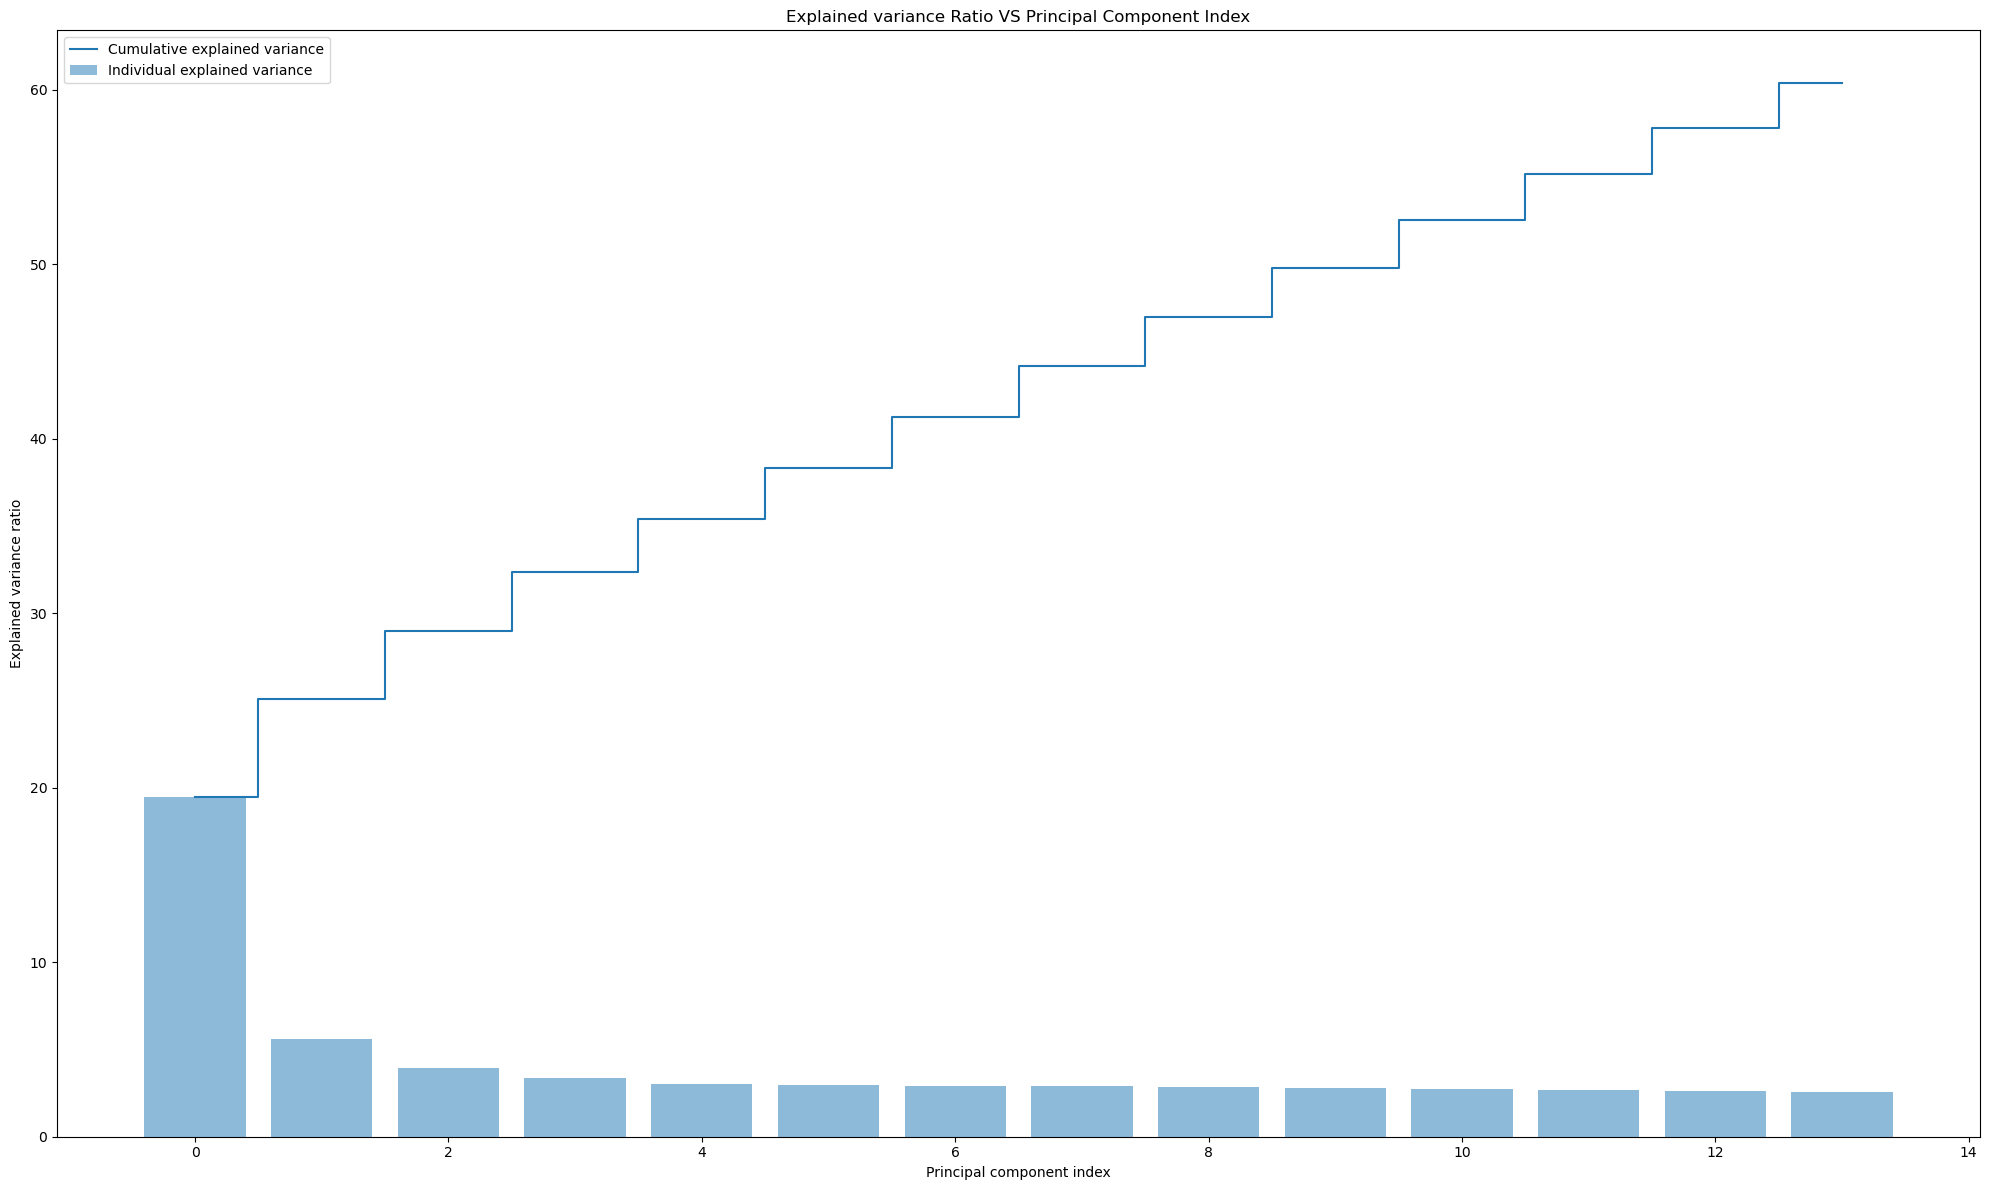

Top 15 most important features in each component
Component 0: ['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']
Component 1: ['RENTVAL', 'BREAD', 'HOUSING_WATER', 'SOFTDRINKS', 'COFFEE', 'TOBACCO', 'FISH', 'FURNISHING', 'ALCOHOL', 'OTHER_EXPENDITURE', 'ACTRENT', 'SUGAR', 'OIL', 'INSURANCE', 'COMMUNICATION']
Component 2: ['ACTRENT', 'RENTVAL', 'HOUSING_WATER', 'OCCASION', 'OTHER_EXPENDITURE', 'RECREATION', 'CLOTH', 'DURABLE', 'HEALTH', 'COFFEE', 'INSURANCE', 'MISCELLANEOUS', 'TRANSPORT', 'FRUIT_VEG', 'OTHER_VEG']
Component 3: ['TOBACCO', 'ALCOHOL', 'TEA', 'FRUIT', 'FOOD_NEC', 'MILK', 'OTHER_EXPENDITURE', 'SOFTDRINKS', 'COCOA', 'COFFEE', 'SUGAR', 'RECREATION', 'DURABLE', 'FRUIT_VEG', 'ACTRENT']
Component 4: ['OTHER_NON_ALCOHOL', 'HEALTH', 'OTHER_VEG', 'MISCELLANEOUS', 'RECREATION', 'TEA', 'OCCASION', 'SERVICES_PRIMARY_GOODS', 'FRUIT_VEG', 'ALCOHOL_PROCDUCTION_SERVICES', 'OT

In [ ]:
X_new, X_pca, num_components = pca(0.60, exp_df, exp_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, exp_df)

### PCA with explained variance of 70%

Components: 18 out of 35 (52.94117647058824%)


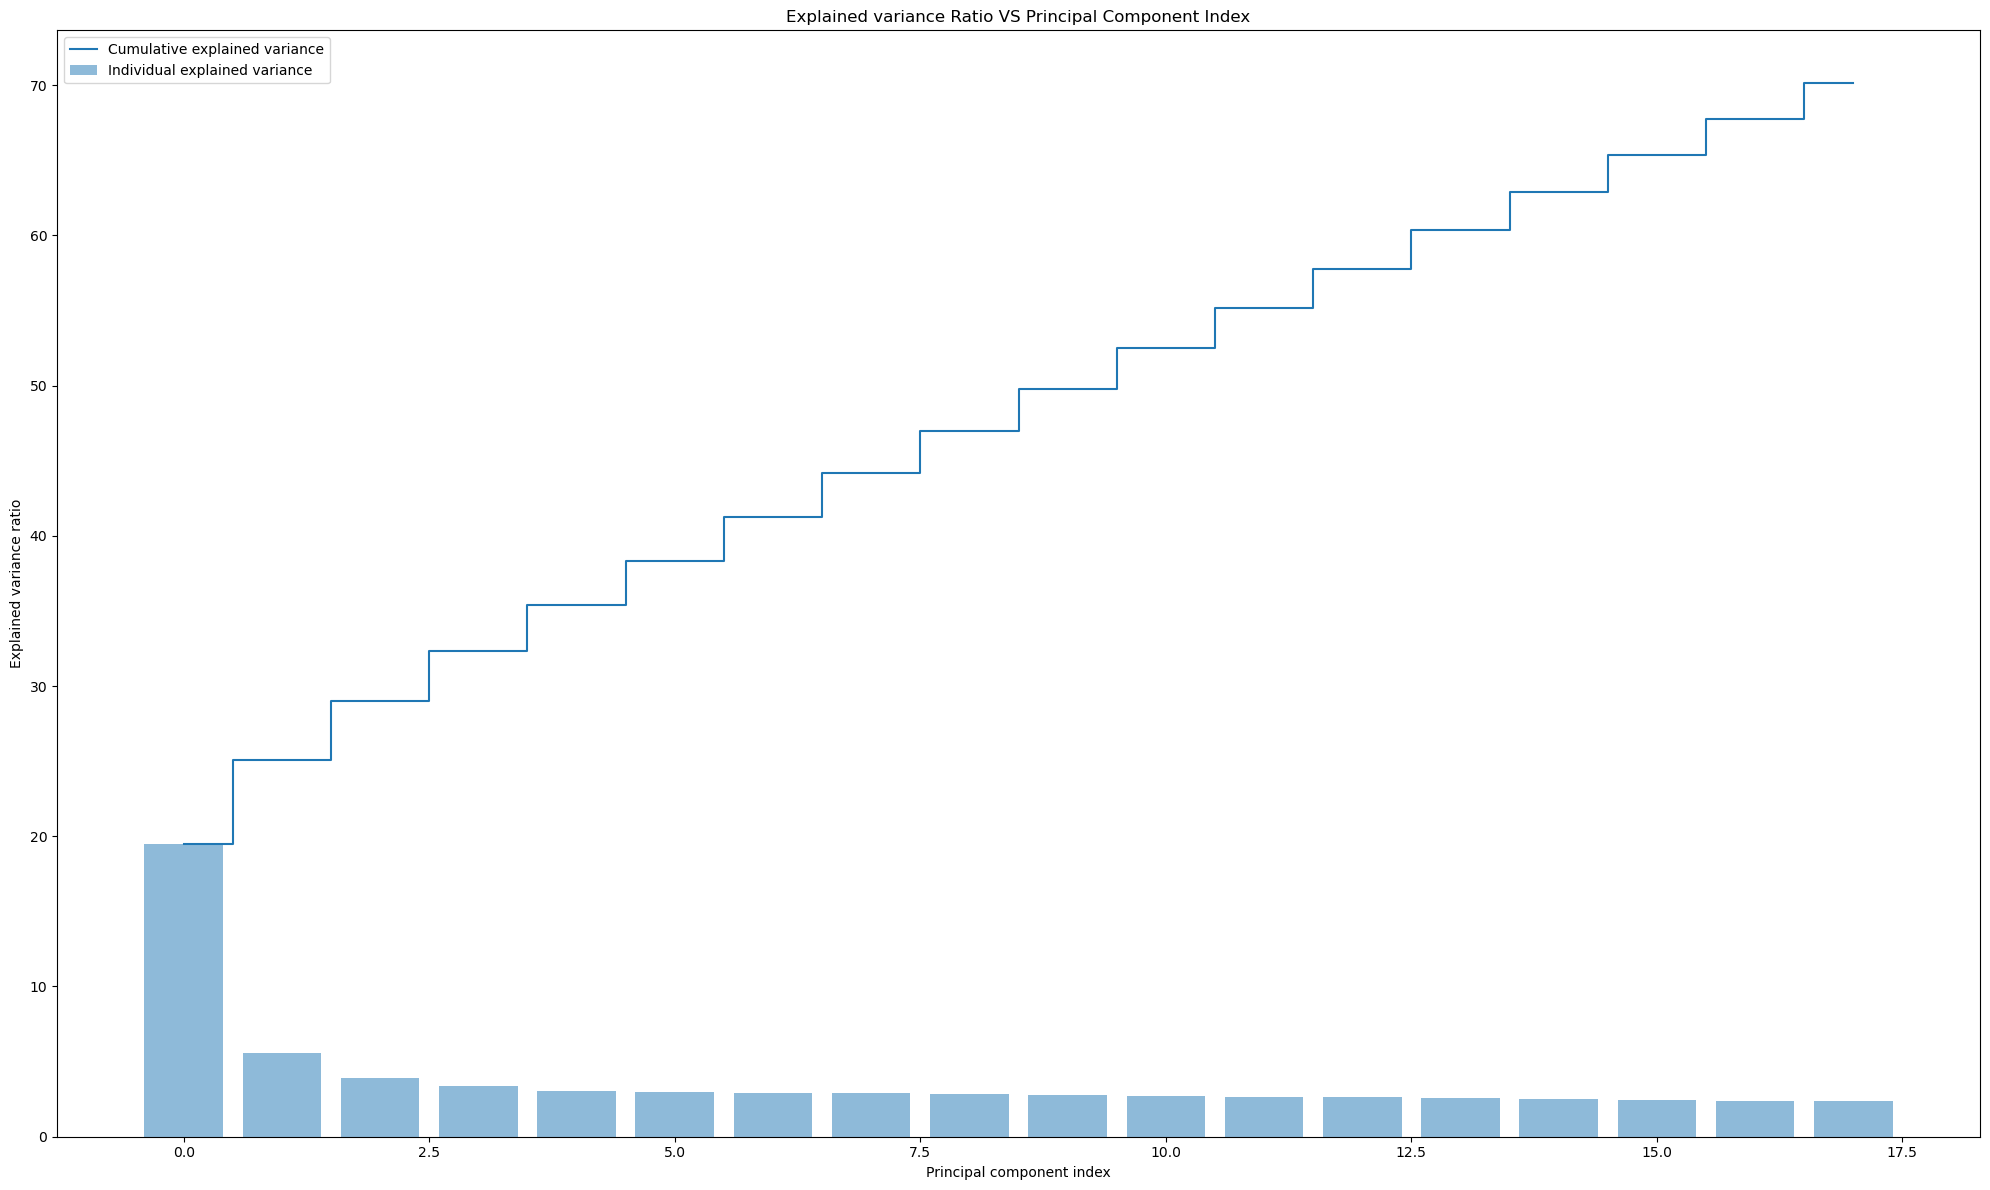

Top 15 most important features in each component
Component 0: ['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']
Component 1: ['RENTVAL', 'BREAD', 'HOUSING_WATER', 'SOFTDRINKS', 'COFFEE', 'TOBACCO', 'FISH', 'FURNISHING', 'ALCOHOL', 'OTHER_EXPENDITURE', 'ACTRENT', 'SUGAR', 'OIL', 'INSURANCE', 'COMMUNICATION']
Component 2: ['ACTRENT', 'RENTVAL', 'HOUSING_WATER', 'OCCASION', 'OTHER_EXPENDITURE', 'RECREATION', 'CLOTH', 'DURABLE', 'HEALTH', 'COFFEE', 'INSURANCE', 'MISCELLANEOUS', 'TRANSPORT', 'FRUIT_VEG', 'OTHER_VEG']
Component 3: ['TOBACCO', 'ALCOHOL', 'TEA', 'FRUIT', 'FOOD_NEC', 'MILK', 'OTHER_EXPENDITURE', 'SOFTDRINKS', 'COCOA', 'COFFEE', 'SUGAR', 'RECREATION', 'DURABLE', 'FRUIT_VEG', 'ACTRENT']
Component 4: ['OTHER_NON_ALCOHOL', 'HEALTH', 'OTHER_VEG', 'MISCELLANEOUS', 'RECREATION', 'TEA', 'OCCASION', 'SERVICES_PRIMARY_GOODS', 'FRUIT_VEG', 'ALCOHOL_PROCDUCTION_SERVICES', 'OT

In [ ]:
X_new, X_pca, num_components = pca(0.70, exp_df, exp_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, exp_df)

### PCA with explained variance of 80%

Components: 23 out of 35 (67.64705882352942%)


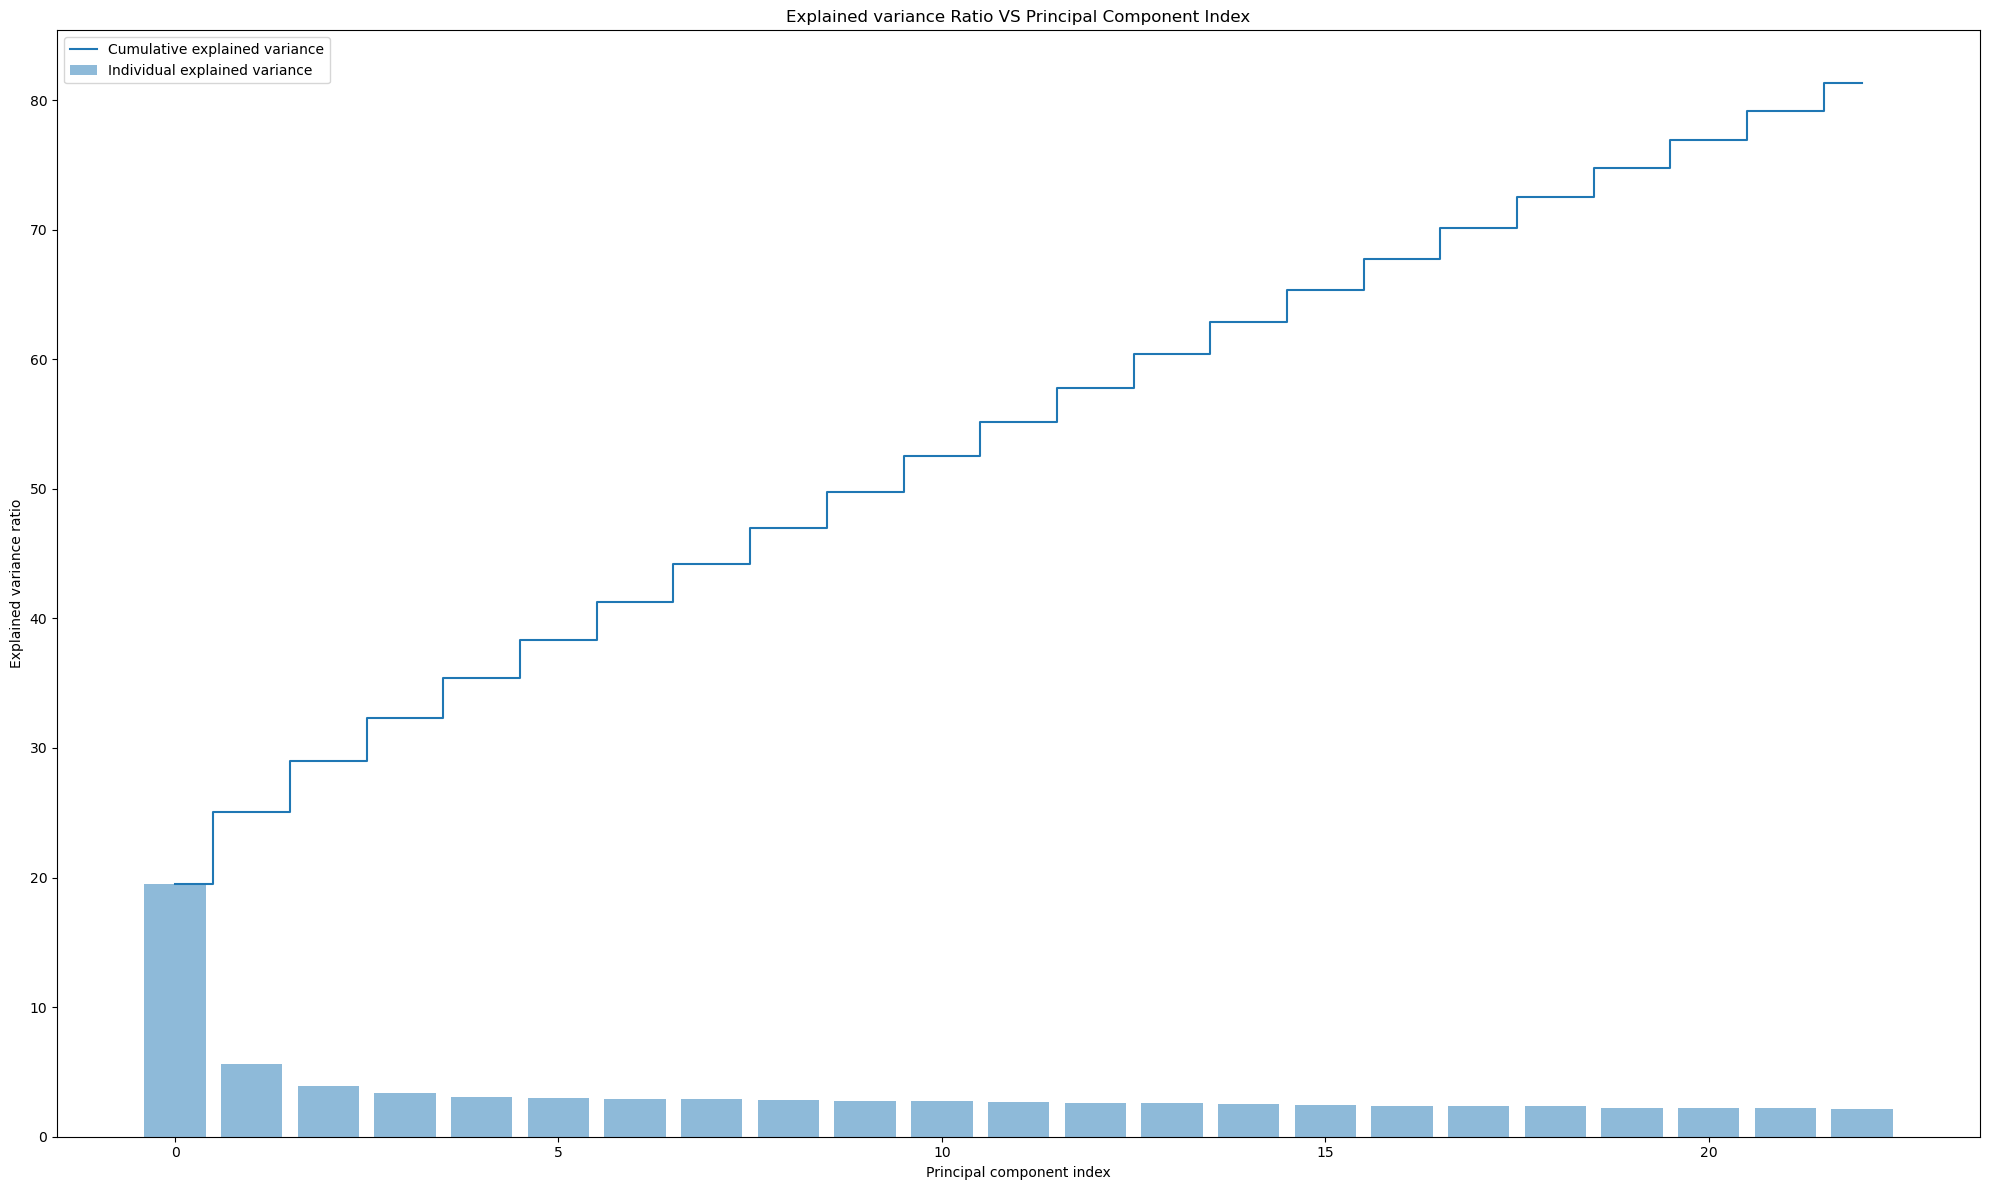

Top 15 most important features in each component
Component 0: ['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']
Component 1: ['RENTVAL', 'BREAD', 'HOUSING_WATER', 'SOFTDRINKS', 'COFFEE', 'TOBACCO', 'FISH', 'FURNISHING', 'ALCOHOL', 'OTHER_EXPENDITURE', 'ACTRENT', 'SUGAR', 'OIL', 'INSURANCE', 'COMMUNICATION']
Component 2: ['ACTRENT', 'RENTVAL', 'HOUSING_WATER', 'OCCASION', 'OTHER_EXPENDITURE', 'RECREATION', 'CLOTH', 'DURABLE', 'HEALTH', 'COFFEE', 'INSURANCE', 'MISCELLANEOUS', 'TRANSPORT', 'FRUIT_VEG', 'OTHER_VEG']
Component 3: ['TOBACCO', 'ALCOHOL', 'TEA', 'FRUIT', 'FOOD_NEC', 'MILK', 'OTHER_EXPENDITURE', 'SOFTDRINKS', 'COCOA', 'COFFEE', 'SUGAR', 'RECREATION', 'DURABLE', 'FRUIT_VEG', 'ACTRENT']
Component 4: ['OTHER_NON_ALCOHOL', 'HEALTH', 'OTHER_VEG', 'MISCELLANEOUS', 'RECREATION', 'TEA', 'OCCASION', 'SERVICES_PRIMARY_GOODS', 'FRUIT_VEG', 'ALCOHOL_PROCDUCTION_SERVICES', 'OT

In [ ]:
X_new, X_pca, num_components = pca(0.80, exp_df, exp_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, exp_df)

### PCA with explained variance of 90%

Components: 28 out of 35 (82.35294117647058%)


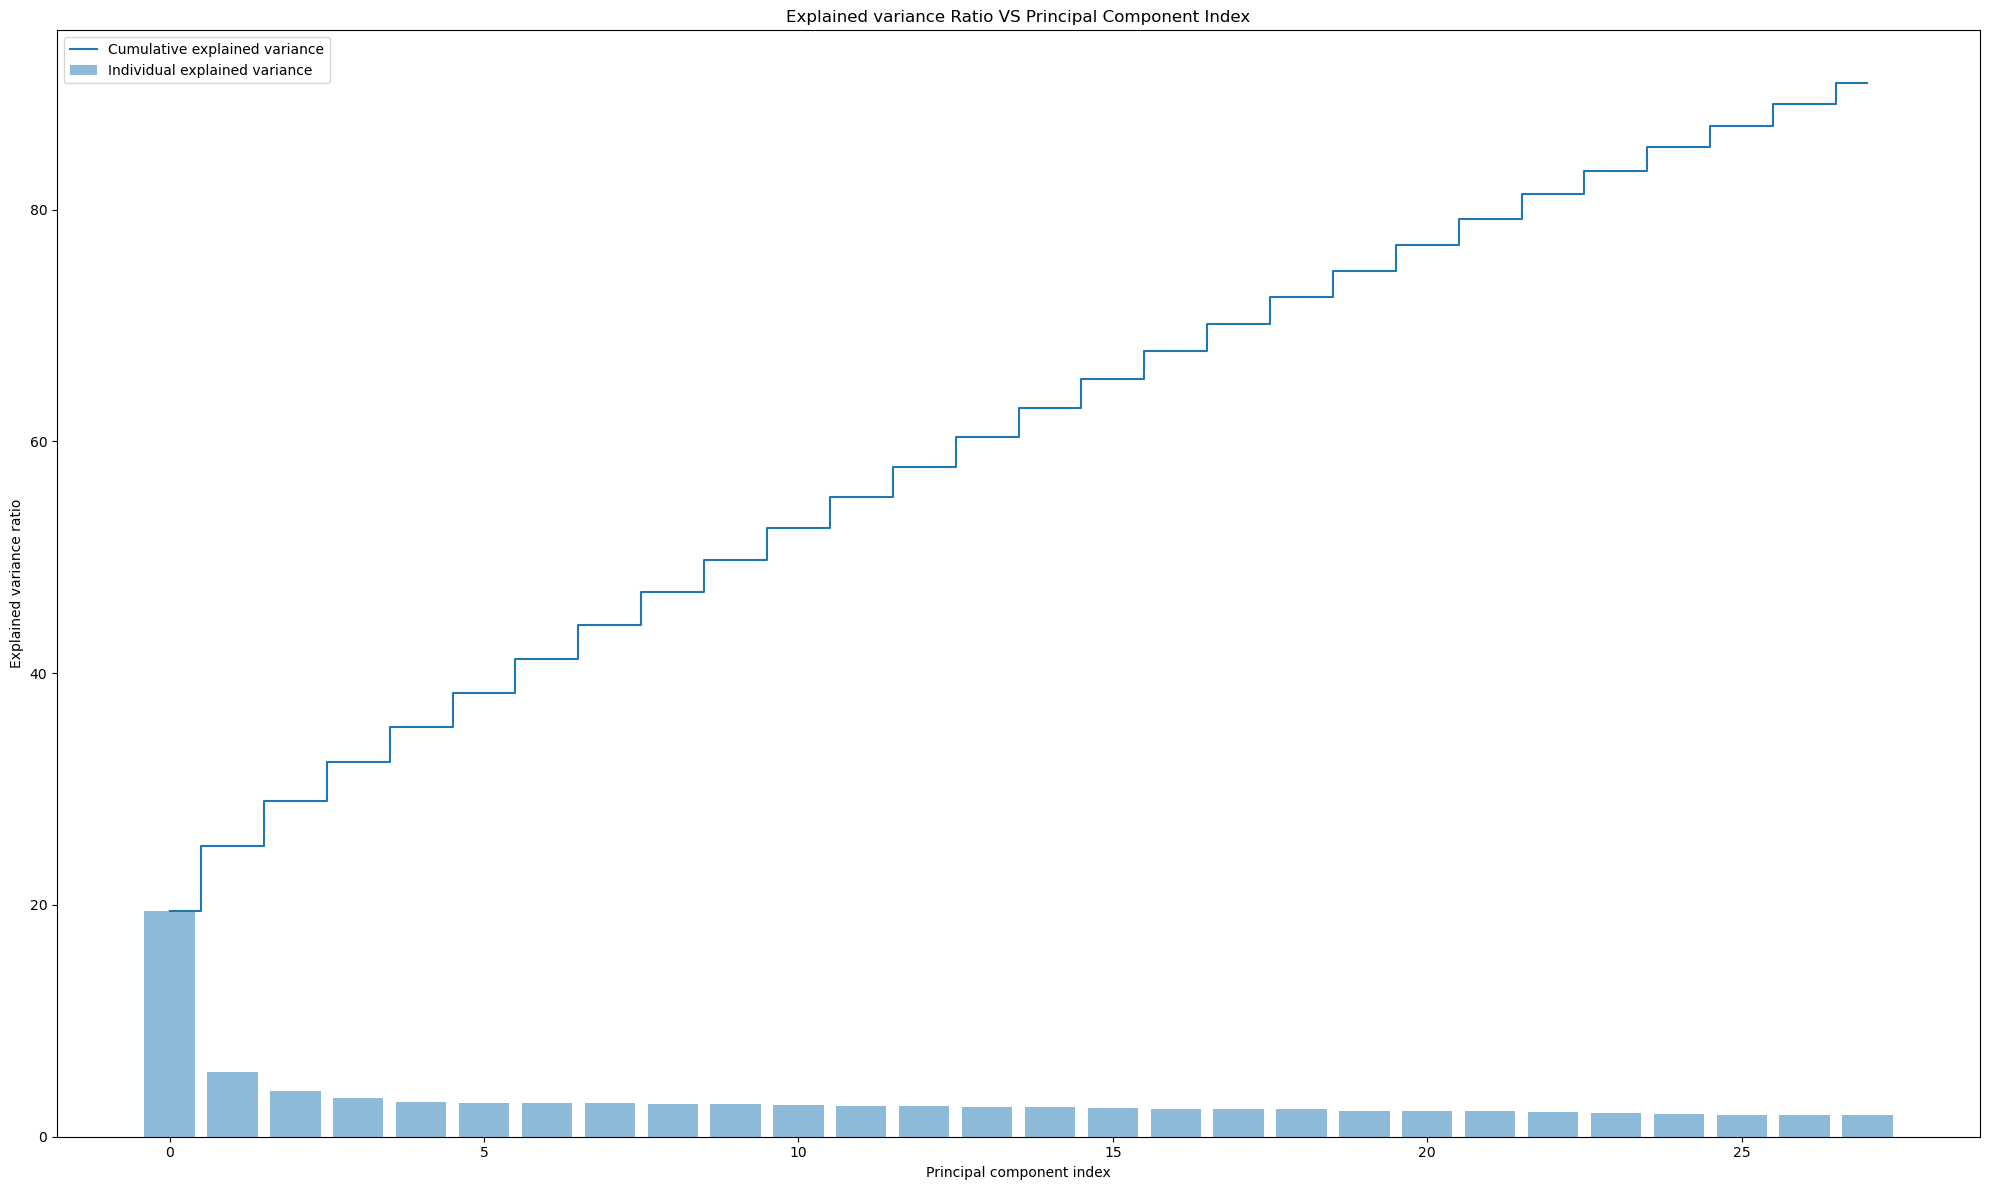

Top 15 most important features in each component
Component 0: ['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']
Component 1: ['RENTVAL', 'BREAD', 'HOUSING_WATER', 'SOFTDRINKS', 'COFFEE', 'TOBACCO', 'FISH', 'FURNISHING', 'ALCOHOL', 'OTHER_EXPENDITURE', 'ACTRENT', 'SUGAR', 'OIL', 'INSURANCE', 'COMMUNICATION']
Component 2: ['ACTRENT', 'RENTVAL', 'HOUSING_WATER', 'OCCASION', 'OTHER_EXPENDITURE', 'RECREATION', 'CLOTH', 'DURABLE', 'HEALTH', 'COFFEE', 'INSURANCE', 'MISCELLANEOUS', 'TRANSPORT', 'FRUIT_VEG', 'OTHER_VEG']
Component 3: ['TOBACCO', 'ALCOHOL', 'TEA', 'FRUIT', 'FOOD_NEC', 'MILK', 'OTHER_EXPENDITURE', 'SOFTDRINKS', 'COCOA', 'COFFEE', 'SUGAR', 'RECREATION', 'DURABLE', 'FRUIT_VEG', 'ACTRENT']
Component 4: ['OTHER_NON_ALCOHOL', 'HEALTH', 'OTHER_VEG', 'MISCELLANEOUS', 'RECREATION', 'TEA', 'OCCASION', 'SERVICES_PRIMARY_GOODS', 'FRUIT_VEG', 'ALCOHOL_PROCDUCTION_SERVICES', 'OT

In [ ]:
X_new, X_pca, num_components = pca(0.90, exp_df, exp_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, exp_df)

### PCA with explained variance of 95%

Components: 31 out of 35 (91.17647058823529%)


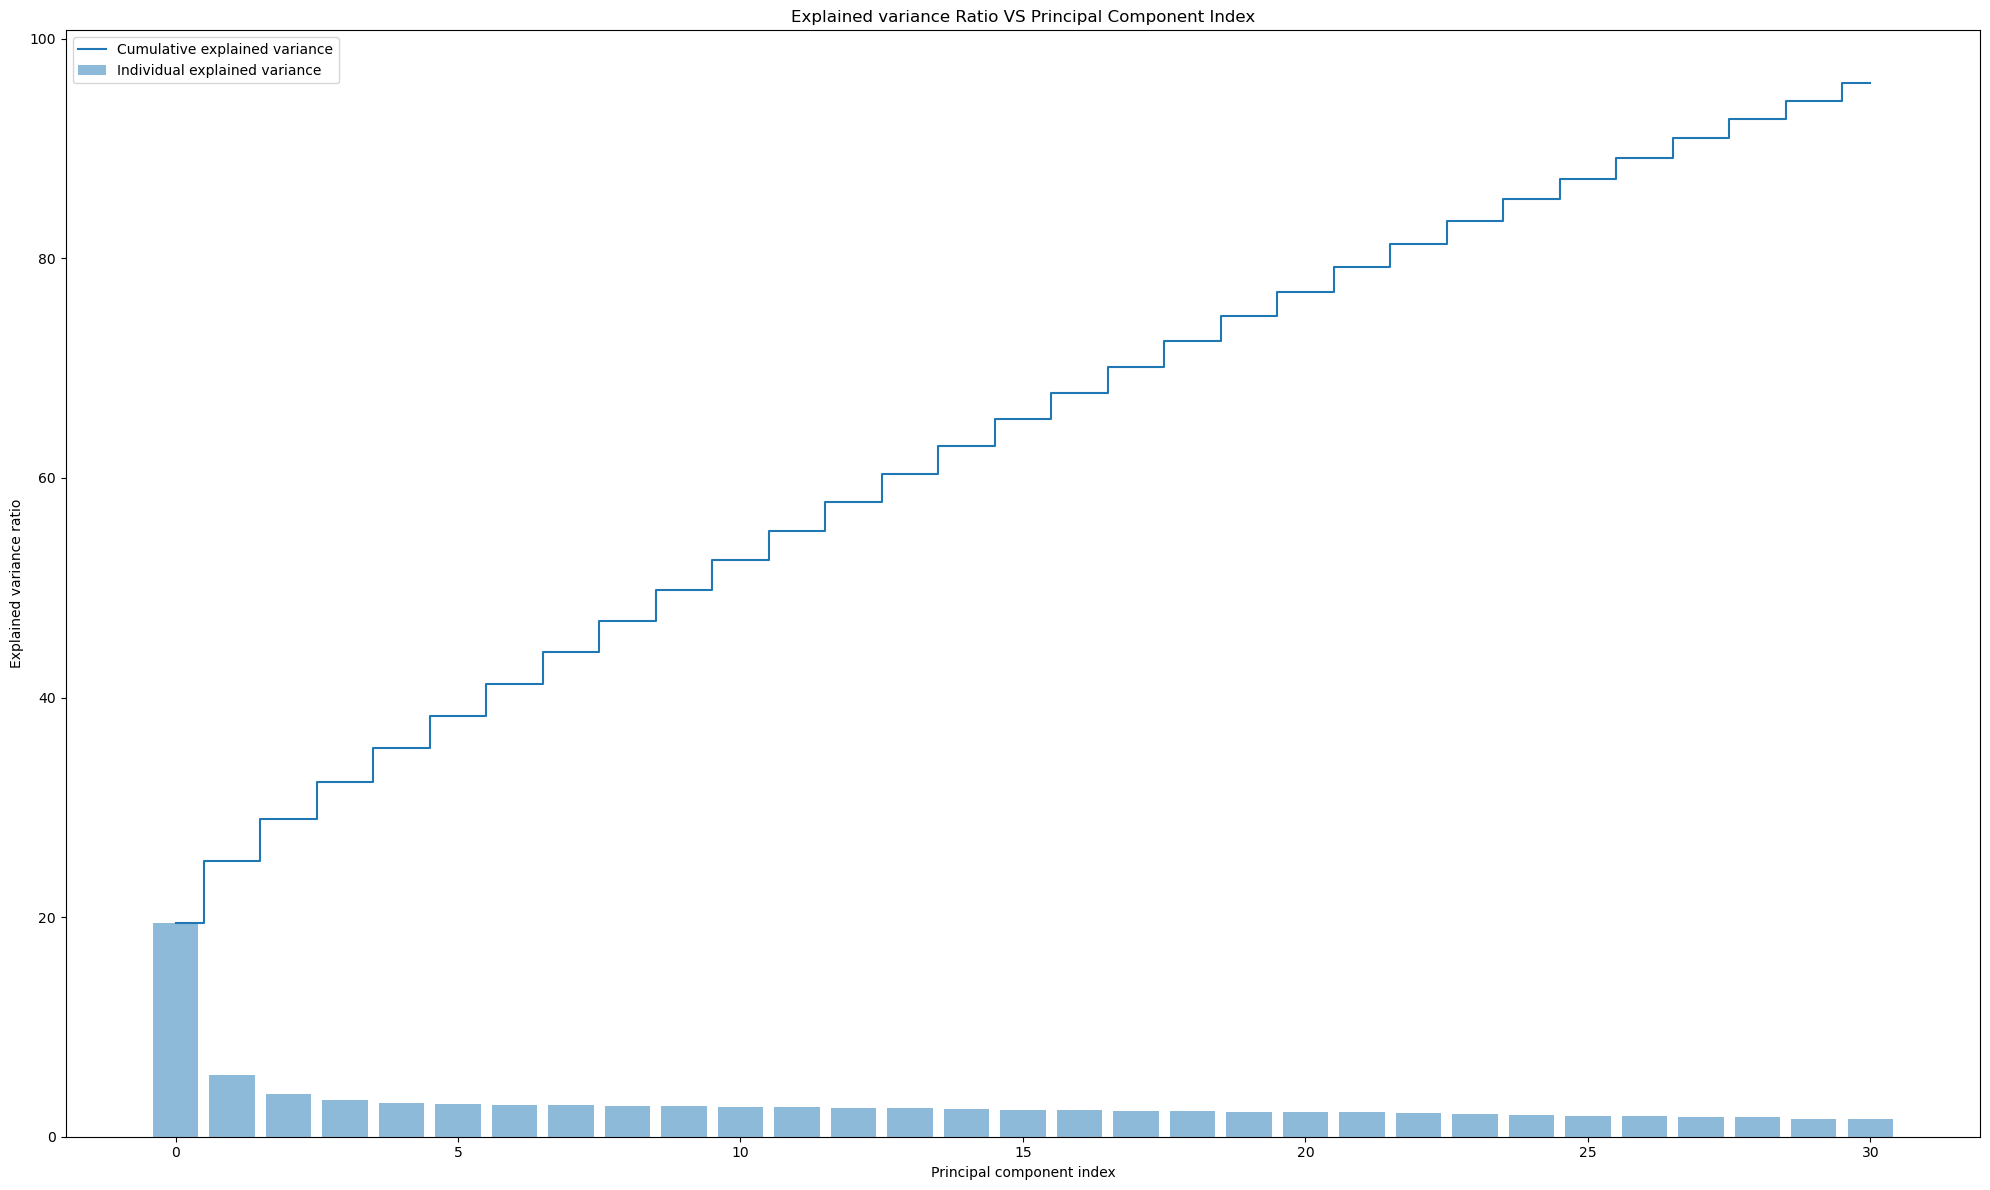

Top 15 most important features in each component
Component 0: ['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']
Component 1: ['RENTVAL', 'BREAD', 'HOUSING_WATER', 'SOFTDRINKS', 'COFFEE', 'TOBACCO', 'FISH', 'FURNISHING', 'ALCOHOL', 'OTHER_EXPENDITURE', 'ACTRENT', 'SUGAR', 'OIL', 'INSURANCE', 'COMMUNICATION']
Component 2: ['ACTRENT', 'RENTVAL', 'HOUSING_WATER', 'OCCASION', 'OTHER_EXPENDITURE', 'RECREATION', 'CLOTH', 'DURABLE', 'HEALTH', 'COFFEE', 'INSURANCE', 'MISCELLANEOUS', 'TRANSPORT', 'FRUIT_VEG', 'OTHER_VEG']
Component 3: ['TOBACCO', 'ALCOHOL', 'TEA', 'FRUIT', 'FOOD_NEC', 'MILK', 'OTHER_EXPENDITURE', 'SOFTDRINKS', 'COCOA', 'COFFEE', 'SUGAR', 'RECREATION', 'DURABLE', 'FRUIT_VEG', 'ACTRENT']
Component 4: ['OTHER_NON_ALCOHOL', 'HEALTH', 'OTHER_VEG', 'MISCELLANEOUS', 'RECREATION', 'TEA', 'OCCASION', 'SERVICES_PRIMARY_GOODS', 'FRUIT_VEG', 'ALCOHOL_PROCDUCTION_SERVICES', 'OT

In [ ]:
X_new, X_pca, num_components = pca(0.95, exp_df, exp_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, exp_df)

## on all Features

### PCA with explained variance of 60%

Components: 64 out of 191 (33.68421052631579%)


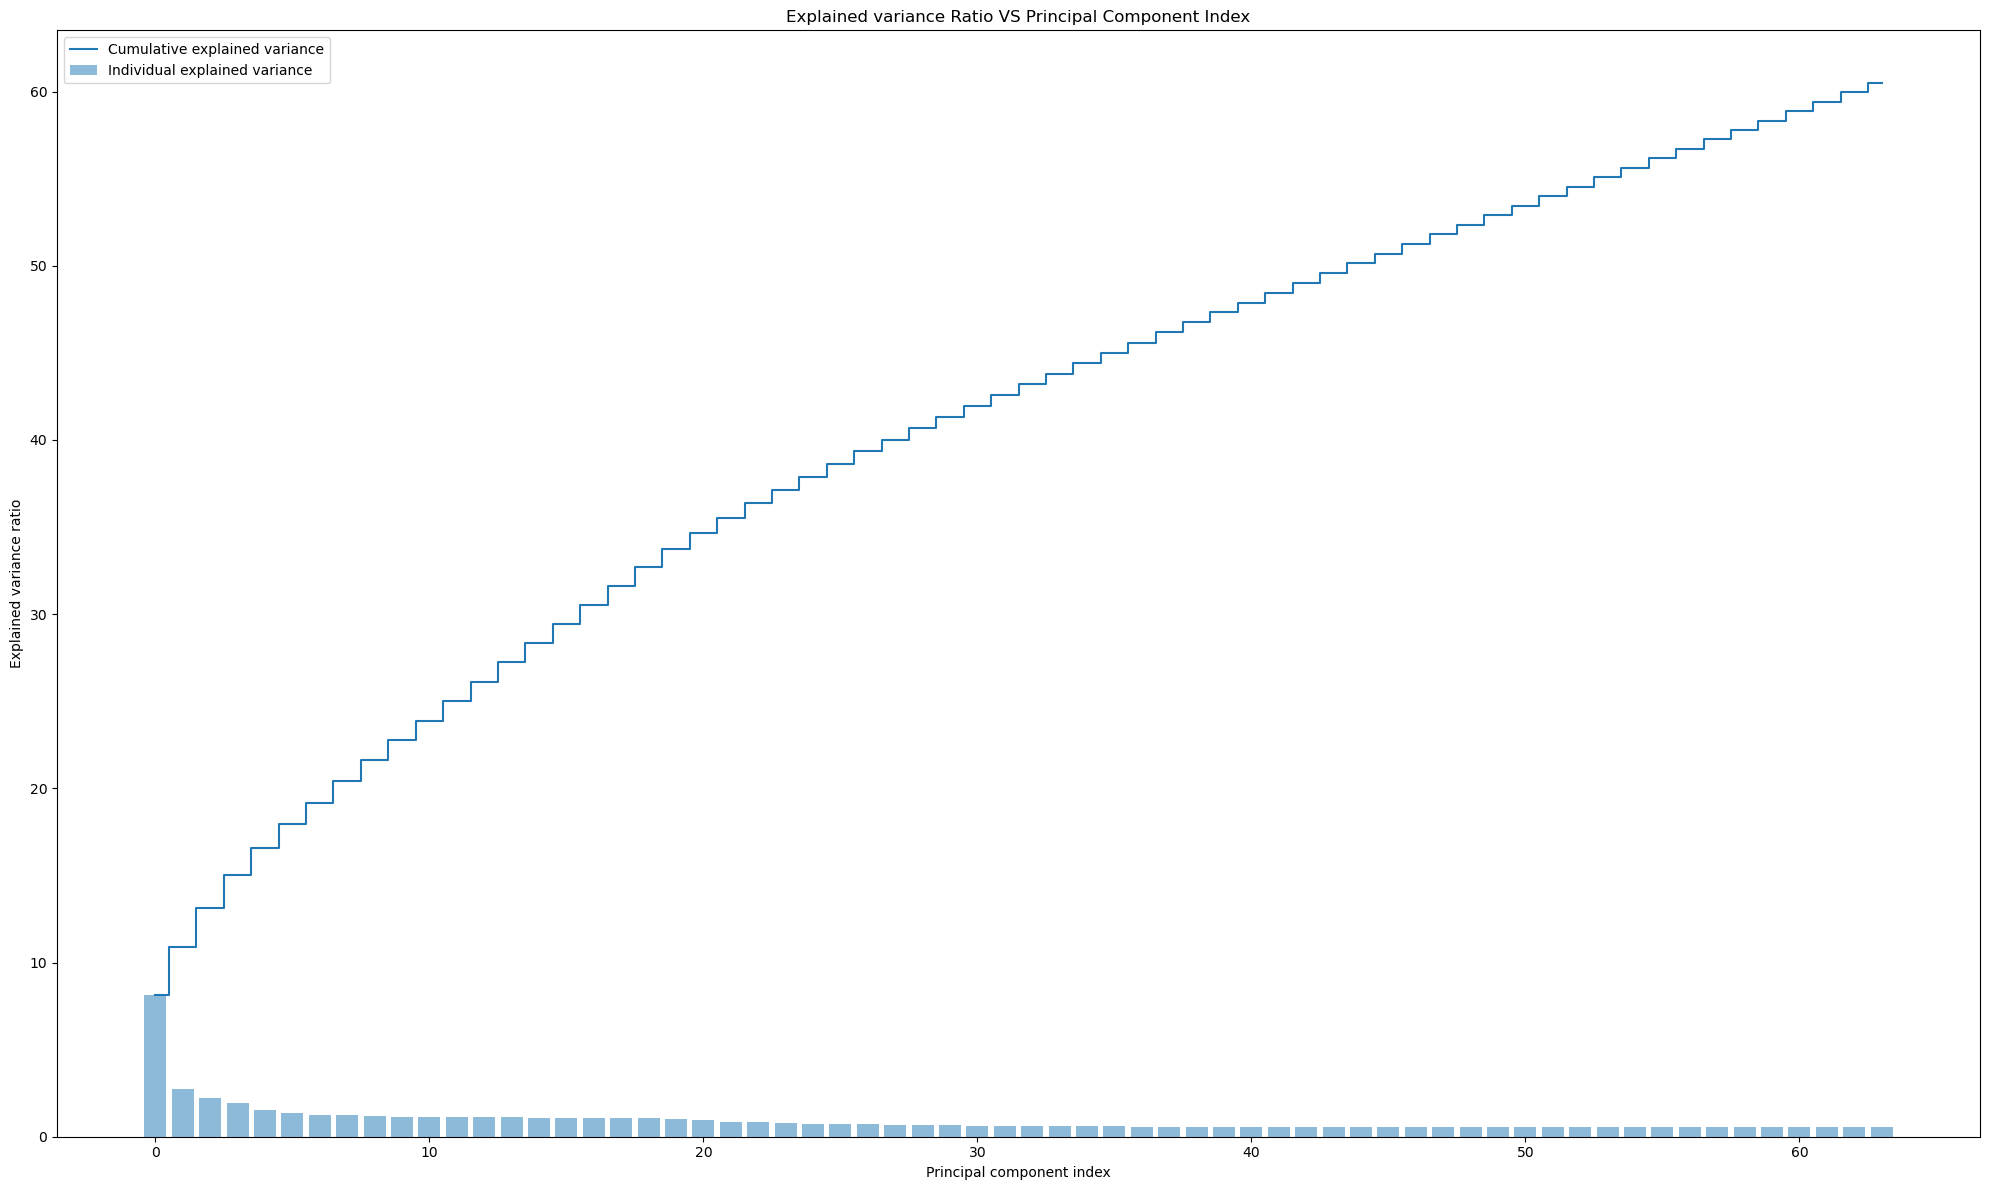

Top 15 most important features in each component
Component 0: ['NFOOD', 'FOOD_ACCOM_SRVC', 'TOTEX', 'OTHREC', 'FOOD_OUTSIDE', 'ALCOHOL_PROCDUCTION_SERVICES', 'HEALTH', 'BREAD', 'WAGES', 'REG_SAL', 'OIL', 'RFACT_POP', 'TRANSPORT', 'ACTRENT', 'PCINC']
Component 1: ['RPSU', 'BWEIGHT', 'RFACT', 'RPROV', 'SEQUENCE_NO', 'REG_2', 'PROV_19', 'PROV_32', 'PROV_12', 'REG_12', 'PROV_56', 'PROV_8', 'PROV_53', 'REG_1', 'REG_15']
Component 2: ['FSIZE', 'LOSSES', 'ALCOHOL_PROCDUCTION_SERVICES', 'RFACT_POP', 'PCINC', 'FOOD_OUTSIDE', 'RPCINC', 'NPCINC', 'MEAT', 'FRUIT', 'VEG', 'FRUIT_VEG', 'ACTRENT', 'MILK', 'RENTVAL']
Component 3: ['REG_11', 'URB', 'TOREC', 'PROV_74', 'EAINC', 'SEQUENCE_NO', 'PROV_73', 'PROV_72', 'OTHER_EXPENDITURE', 'HOUSING_WATER', 'FOOD_HOME', 'TOTDIS', 'NET_CFG', 'OTHREC', 'NET_RET']
Component 4: ['SEQUENCE_NO', 'EAINC', 'OTHER_EXPENDITURE', 'NET_RET', 'PCINC', 'NPCINC', 'income_status', 'REG_13', 'NET_NEC_A8', 'REG_1', 'TOTDIS', 'RPCINC', 'REG_2', 'REG_15', 'PPCINC']
Component 5: 

In [ ]:
X_new, X_pca, num_components = pca(0.60, features_21, ohe_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, ohe_df)

### PCA with explained variance of 70%

Components: 82 out of 191 (43.15789473684211%)


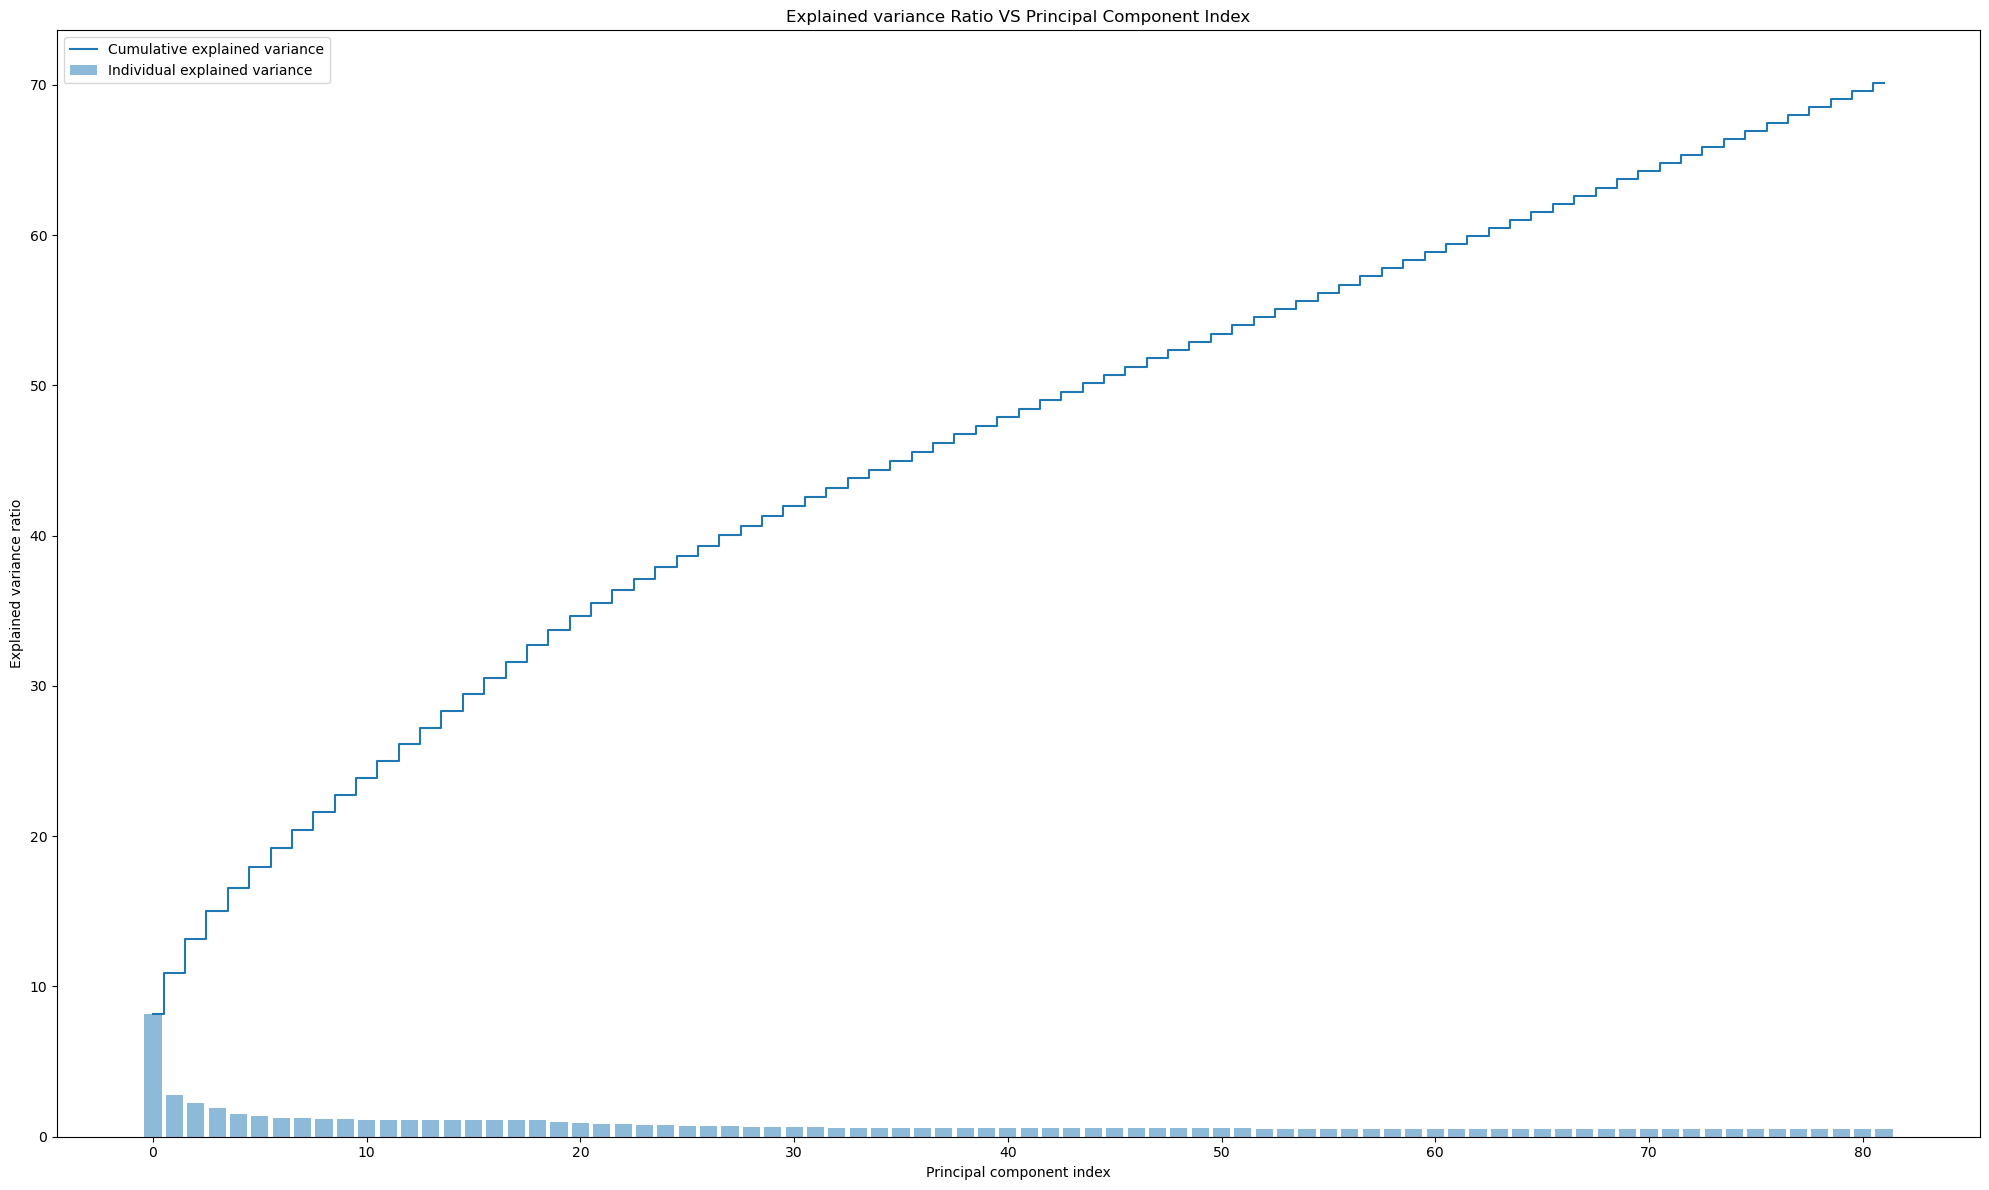

Top 15 most important features in each component
Component 0: ['NFOOD', 'FOOD_ACCOM_SRVC', 'TOTEX', 'OTHREC', 'FOOD_OUTSIDE', 'ALCOHOL_PROCDUCTION_SERVICES', 'HEALTH', 'BREAD', 'WAGES', 'REG_SAL', 'OIL', 'RFACT_POP', 'TRANSPORT', 'ACTRENT', 'PCINC']
Component 1: ['RPSU', 'BWEIGHT', 'RFACT', 'RPROV', 'SEQUENCE_NO', 'REG_2', 'PROV_19', 'PROV_32', 'PROV_12', 'REG_12', 'PROV_56', 'PROV_8', 'PROV_53', 'REG_1', 'REG_15']
Component 2: ['FSIZE', 'LOSSES', 'ALCOHOL_PROCDUCTION_SERVICES', 'RFACT_POP', 'PCINC', 'FOOD_OUTSIDE', 'RPCINC', 'NPCINC', 'MEAT', 'FRUIT', 'VEG', 'FRUIT_VEG', 'ACTRENT', 'MILK', 'RENTVAL']
Component 3: ['REG_11', 'URB', 'TOREC', 'PROV_74', 'EAINC', 'SEQUENCE_NO', 'PROV_73', 'PROV_72', 'OTHER_EXPENDITURE', 'HOUSING_WATER', 'FOOD_HOME', 'TOTDIS', 'NET_CFG', 'OTHREC', 'NET_RET']
Component 4: ['SEQUENCE_NO', 'EAINC', 'OTHER_EXPENDITURE', 'NET_RET', 'PCINC', 'NPCINC', 'income_status', 'REG_13', 'NET_NEC_A8', 'REG_1', 'TOTDIS', 'RPCINC', 'REG_2', 'REG_15', 'PPCINC']
Component 5: 

In [ ]:
X_new, X_pca, num_components = pca(0.70, features_21, ohe_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, ohe_df)

### PCA with explained variance of 80%

Components: 101 out of 191 (53.1578947368421%)


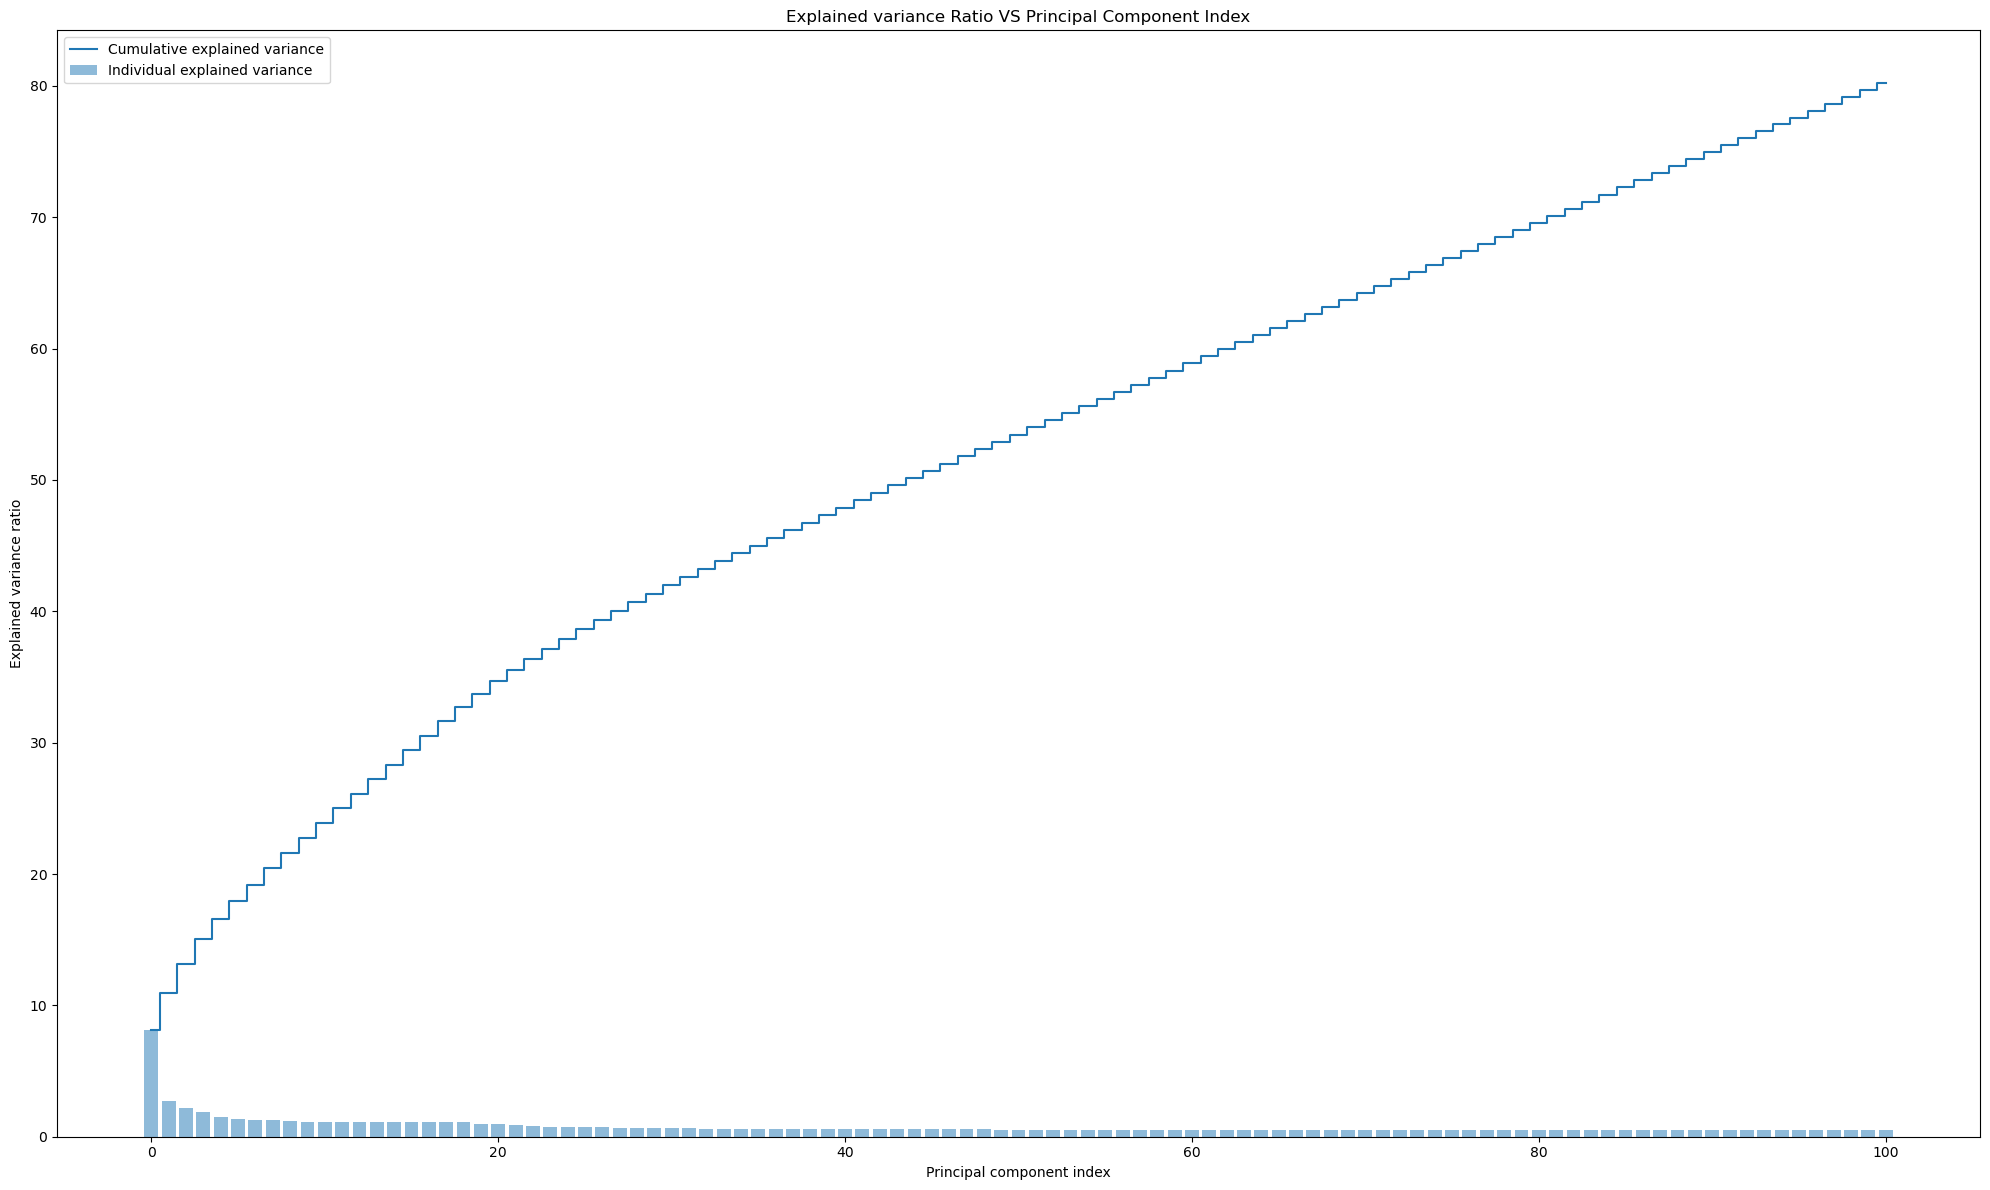

Top 15 most important features in each component
Component 0: ['NFOOD', 'FOOD_ACCOM_SRVC', 'TOTEX', 'OTHREC', 'FOOD_OUTSIDE', 'ALCOHOL_PROCDUCTION_SERVICES', 'HEALTH', 'BREAD', 'WAGES', 'REG_SAL', 'OIL', 'RFACT_POP', 'TRANSPORT', 'ACTRENT', 'PCINC']
Component 1: ['RPSU', 'BWEIGHT', 'RFACT', 'RPROV', 'SEQUENCE_NO', 'REG_2', 'PROV_19', 'PROV_32', 'PROV_12', 'REG_12', 'PROV_56', 'PROV_8', 'PROV_53', 'REG_1', 'REG_15']
Component 2: ['FSIZE', 'LOSSES', 'ALCOHOL_PROCDUCTION_SERVICES', 'RFACT_POP', 'PCINC', 'FOOD_OUTSIDE', 'RPCINC', 'NPCINC', 'MEAT', 'FRUIT', 'VEG', 'FRUIT_VEG', 'ACTRENT', 'MILK', 'RENTVAL']
Component 3: ['REG_11', 'URB', 'TOREC', 'PROV_74', 'EAINC', 'SEQUENCE_NO', 'PROV_73', 'PROV_72', 'OTHER_EXPENDITURE', 'HOUSING_WATER', 'FOOD_HOME', 'TOTDIS', 'NET_CFG', 'OTHREC', 'NET_RET']
Component 4: ['SEQUENCE_NO', 'EAINC', 'OTHER_EXPENDITURE', 'NET_RET', 'PCINC', 'NPCINC', 'income_status', 'REG_13', 'NET_NEC_A8', 'REG_1', 'TOTDIS', 'RPCINC', 'REG_2', 'REG_15', 'PPCINC']
Component 5: 

In [ ]:
X_new, X_pca, num_components = pca(0.80, features_21, ohe_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, ohe_df)

### PCA with explained variance of 90%

Components: 122 out of 191 (64.21052631578948%)


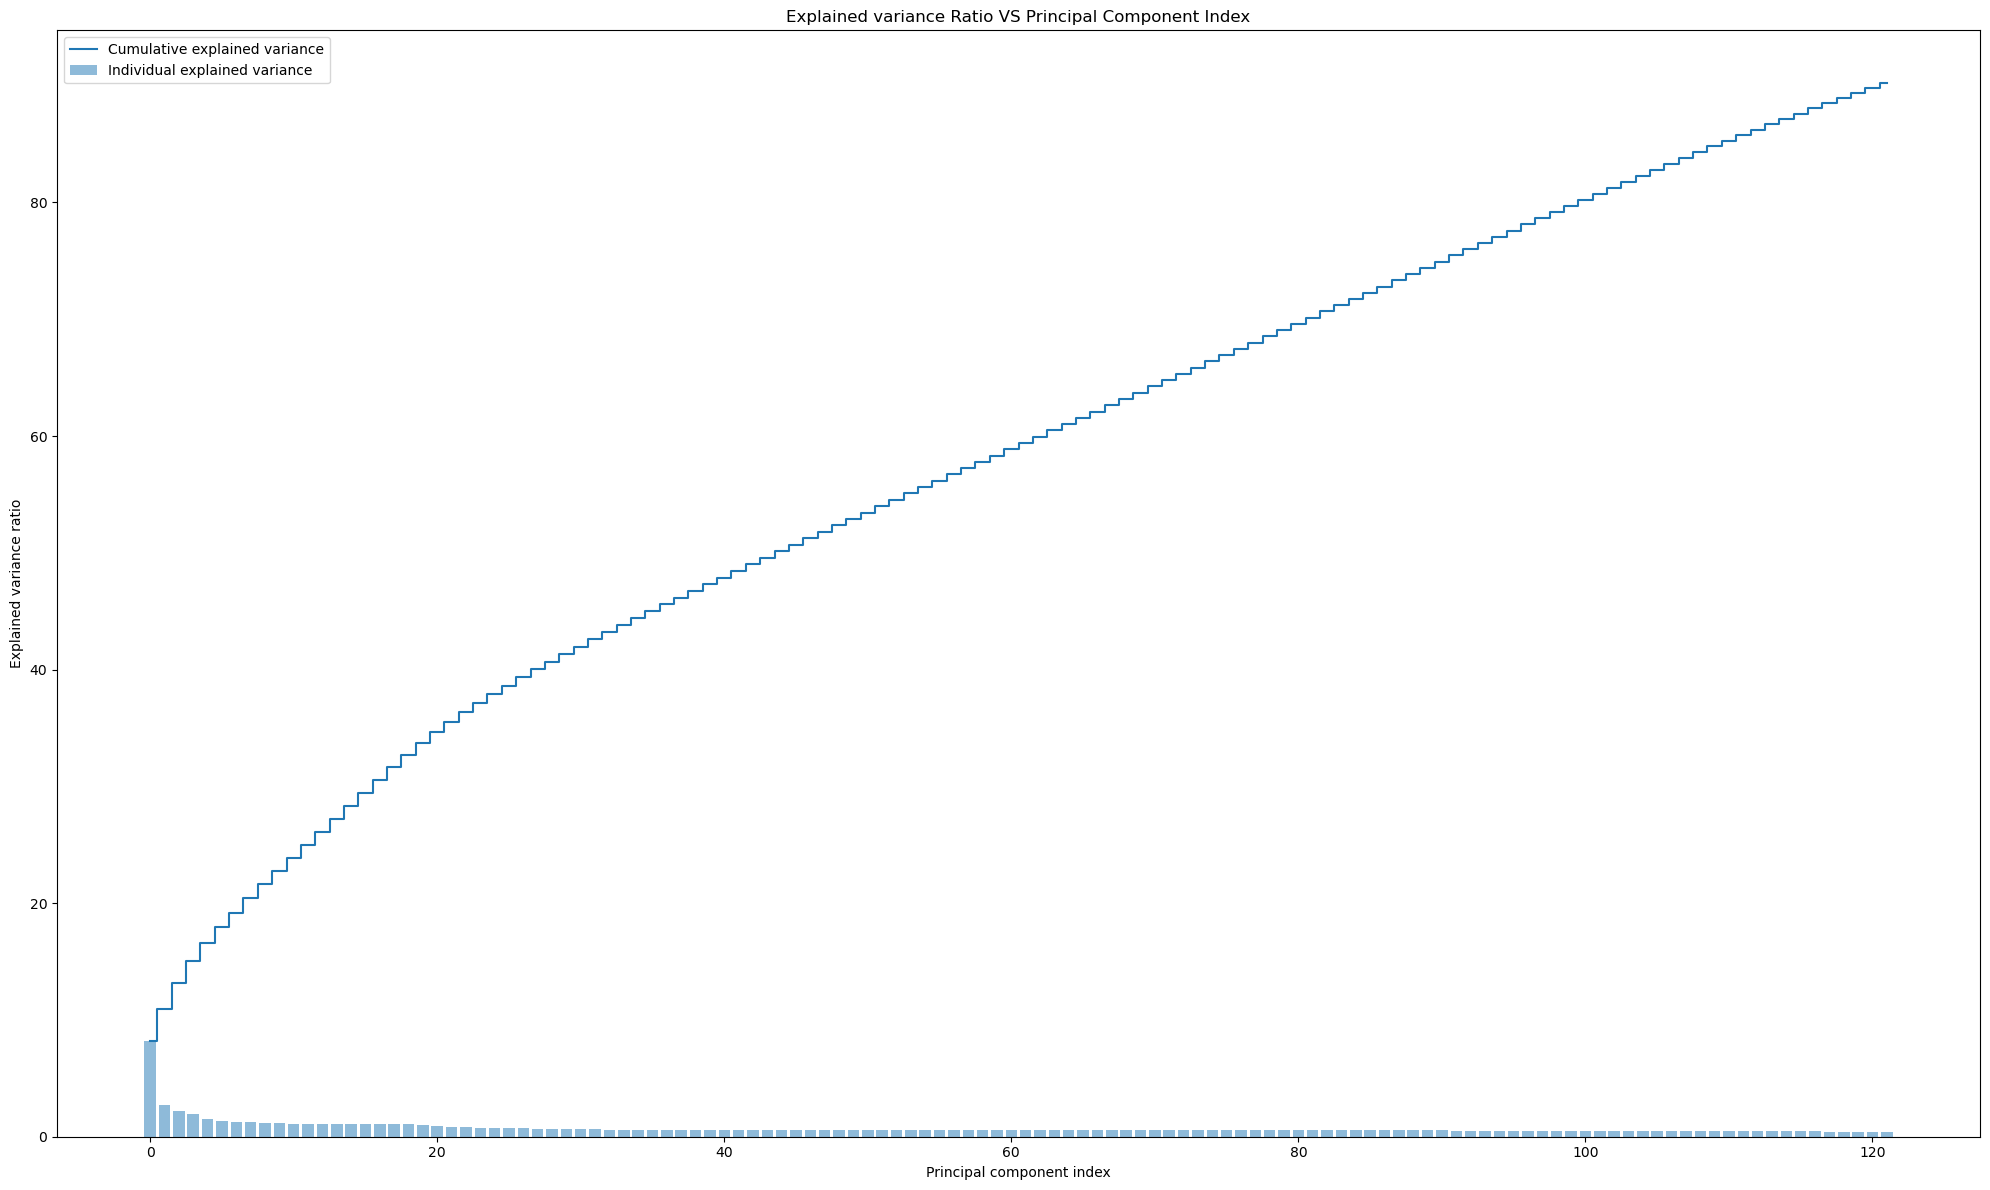

Top 15 most important features in each component
Component 0: ['NFOOD', 'FOOD_ACCOM_SRVC', 'TOTEX', 'OTHREC', 'FOOD_OUTSIDE', 'ALCOHOL_PROCDUCTION_SERVICES', 'HEALTH', 'BREAD', 'WAGES', 'REG_SAL', 'OIL', 'RFACT_POP', 'TRANSPORT', 'ACTRENT', 'PCINC']
Component 1: ['RPSU', 'BWEIGHT', 'RFACT', 'RPROV', 'SEQUENCE_NO', 'REG_2', 'PROV_19', 'PROV_32', 'PROV_12', 'REG_12', 'PROV_56', 'PROV_8', 'PROV_53', 'REG_1', 'REG_15']
Component 2: ['FSIZE', 'LOSSES', 'ALCOHOL_PROCDUCTION_SERVICES', 'RFACT_POP', 'PCINC', 'FOOD_OUTSIDE', 'RPCINC', 'NPCINC', 'MEAT', 'FRUIT', 'VEG', 'FRUIT_VEG', 'ACTRENT', 'MILK', 'RENTVAL']
Component 3: ['REG_11', 'URB', 'TOREC', 'PROV_74', 'EAINC', 'SEQUENCE_NO', 'PROV_73', 'PROV_72', 'OTHER_EXPENDITURE', 'HOUSING_WATER', 'FOOD_HOME', 'TOTDIS', 'NET_CFG', 'OTHREC', 'NET_RET']
Component 4: ['SEQUENCE_NO', 'EAINC', 'OTHER_EXPENDITURE', 'NET_RET', 'PCINC', 'NPCINC', 'income_status', 'REG_13', 'NET_NEC_A8', 'REG_1', 'TOTDIS', 'RPCINC', 'REG_2', 'REG_15', 'PPCINC']
Component 5: 

In [ ]:
X_new, X_pca, num_components = pca(0.90, features_21, ohe_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, ohe_df)

### PCA with explained variance of 95%

Components: 135 out of 191 (71.05263157894737%)


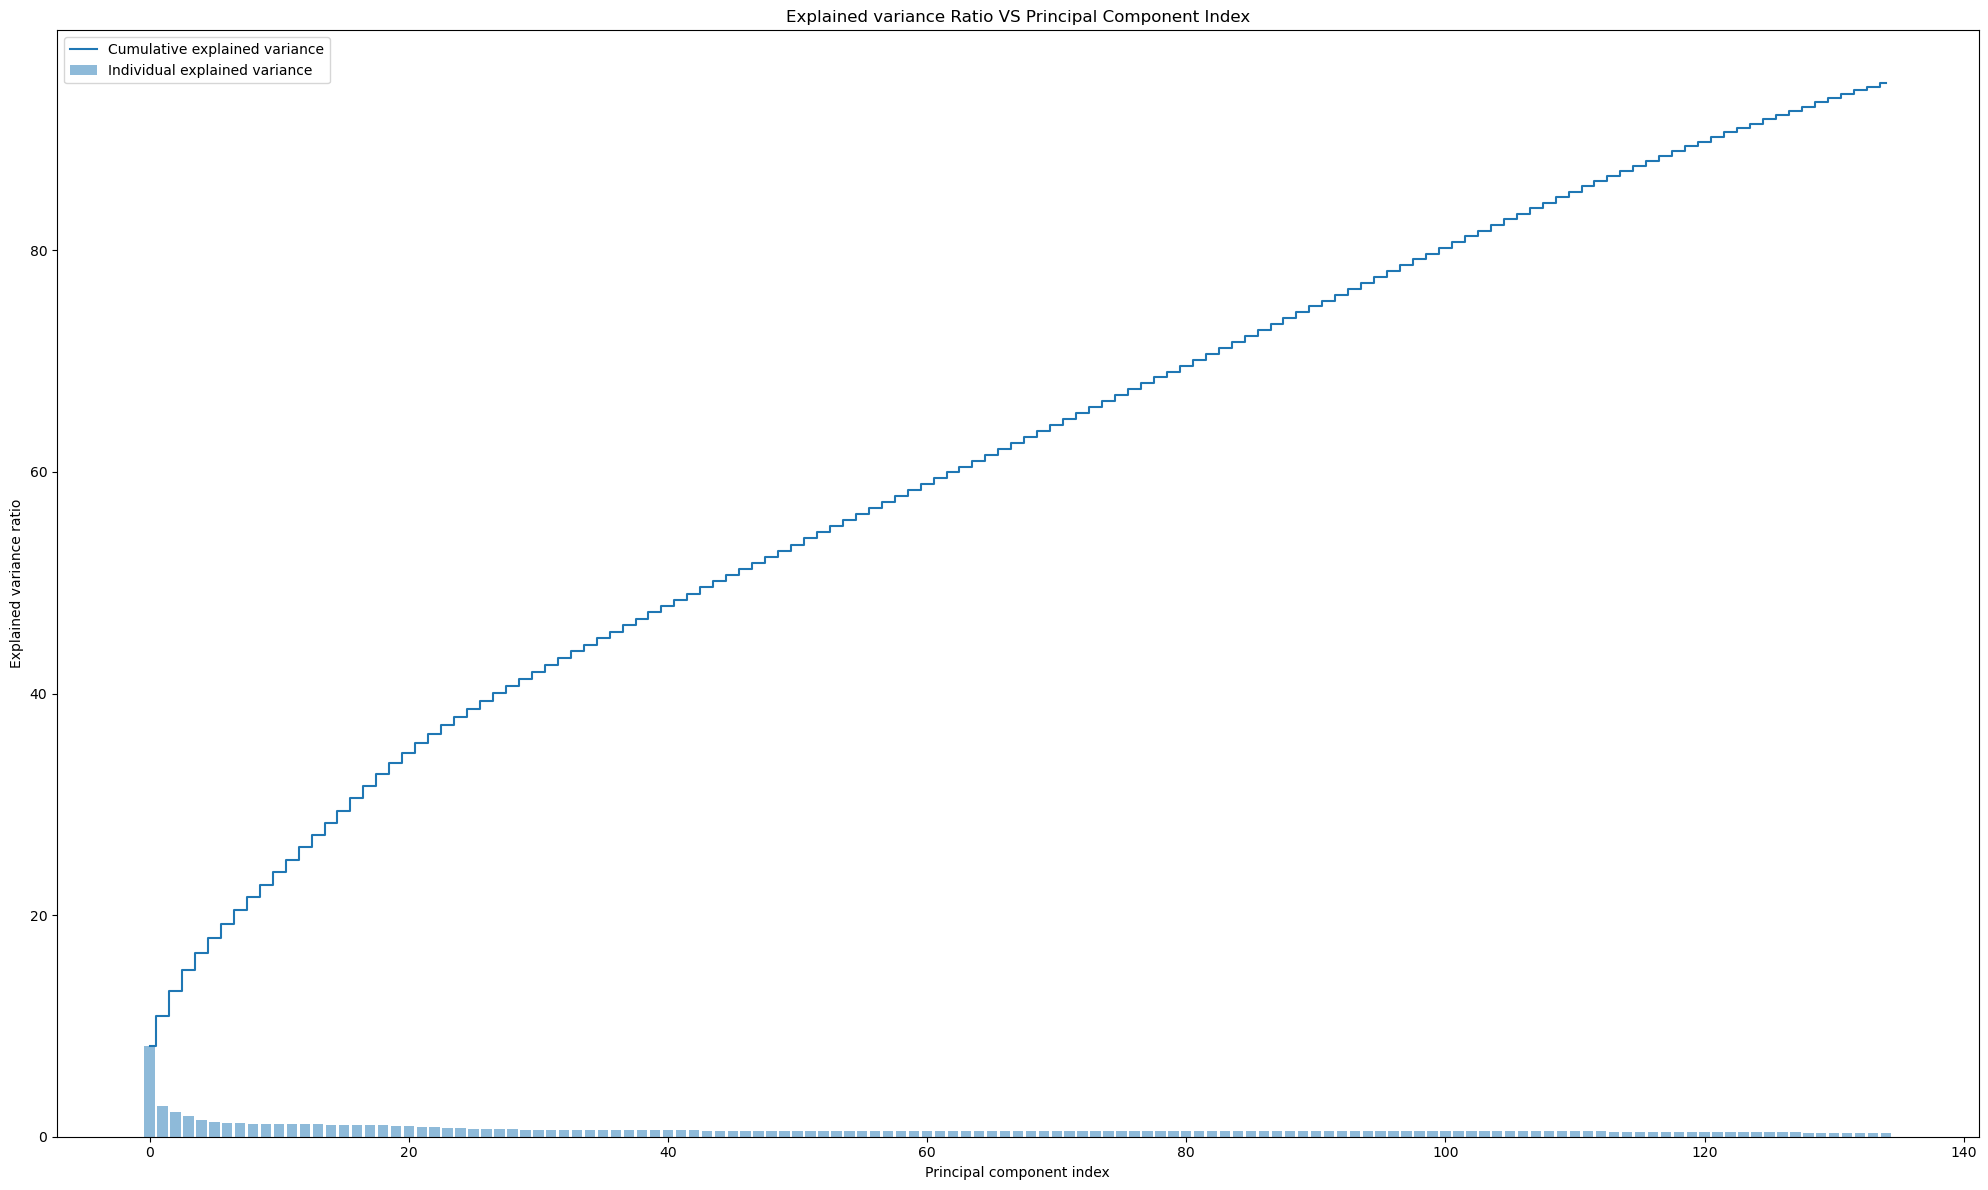

Top 15 most important features in each component
Component 0: ['NFOOD', 'FOOD_ACCOM_SRVC', 'TOTEX', 'OTHREC', 'FOOD_OUTSIDE', 'ALCOHOL_PROCDUCTION_SERVICES', 'HEALTH', 'BREAD', 'WAGES', 'REG_SAL', 'OIL', 'RFACT_POP', 'TRANSPORT', 'ACTRENT', 'PCINC']
Component 1: ['RPSU', 'BWEIGHT', 'RFACT', 'RPROV', 'SEQUENCE_NO', 'REG_2', 'PROV_19', 'PROV_32', 'PROV_12', 'REG_12', 'PROV_56', 'PROV_8', 'PROV_53', 'REG_1', 'REG_15']
Component 2: ['FSIZE', 'LOSSES', 'ALCOHOL_PROCDUCTION_SERVICES', 'RFACT_POP', 'PCINC', 'FOOD_OUTSIDE', 'RPCINC', 'NPCINC', 'MEAT', 'FRUIT', 'VEG', 'FRUIT_VEG', 'ACTRENT', 'MILK', 'RENTVAL']
Component 3: ['REG_11', 'URB', 'TOREC', 'PROV_74', 'EAINC', 'SEQUENCE_NO', 'PROV_73', 'PROV_72', 'OTHER_EXPENDITURE', 'HOUSING_WATER', 'FOOD_HOME', 'TOTDIS', 'NET_CFG', 'OTHREC', 'NET_RET']
Component 4: ['SEQUENCE_NO', 'EAINC', 'OTHER_EXPENDITURE', 'NET_RET', 'PCINC', 'NPCINC', 'income_status', 'REG_13', 'NET_NEC_A8', 'REG_1', 'TOTDIS', 'RPCINC', 'REG_2', 'REG_15', 'PPCINC']
Component 5: 

In [ ]:
X_new, X_pca, num_components = pca(0.95, features_21, ohe_df)
plot_pca(X_pca)
feature_importance_pca_components(X_pca, ohe_df)

# Feature Selection using Random Forest Importance (RFI) 

### on Expenditure Features only in 2021 dataset

In [ ]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(exp_df, target_21)
exp_fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

exp_best_features_rfi = exp_df.columns[exp_fs_indices_rfi].values
exp_best_features_rfi

array(['HOUSING_WATER', 'COMMUNICATION', 'MEAT', 'MISCELLANEOUS',
       'RENTVAL', 'INSURANCE', 'FRUIT', 'TRANSPORT', 'HEALTH', 'BREAD'],
      dtype=object)

In [ ]:
exp_feature_importances_rfi = model_rfi.feature_importances_[exp_fs_indices_rfi]
exp_feature_importances_rfi

array([0.1585706 , 0.09391765, 0.08537137, 0.06832779, 0.05831292,
       0.0538257 , 0.04702731, 0.04297356, 0.03399873, 0.03332792])

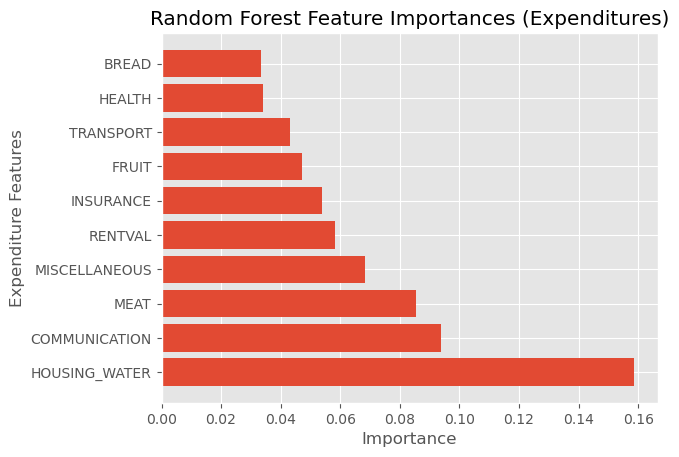

In [ ]:
# visualizing the top 10 important expenditure features 
plt.style.use("ggplot")

def plot_imp_features(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances (Expenditures)')
    plt.xlabel("Importance")
    plt.ylabel("Expenditure Features")
    plt.show()

plot_imp_features(exp_best_features_rfi, exp_feature_importances_rfi, 'Random Forest')

### on all Features in 2021 dataset

In [ ]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(features_21, target_21)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
best_features_rfi = features_21.columns[fs_indices_rfi].values
best_features_rfi

array(['TOREC', 'TOTDIS', 'TOTEX', 'WAGES', 'FOOD', 'NFOOD', 'PCINC',
       'HOUSING_WATER', 'REG_SAL', 'NPCINC'], dtype=object)

In [ ]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.30216454, 0.11422925, 0.06566682, 0.05109806, 0.04487719,
       0.04250374, 0.03130387, 0.02968085, 0.02900016, 0.02734357])

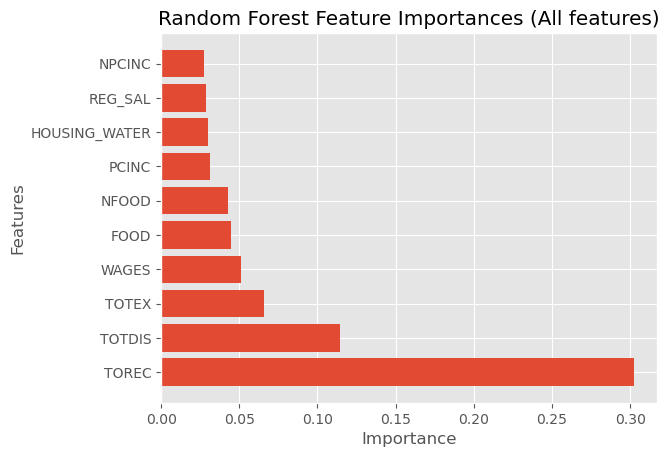

In [ ]:
# visualizing the top 10 important features in 2021 dataset
plt.style.use("ggplot")

def plot_imp_features(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances (All features)')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp_features(best_features_rfi, feature_importances_rfi, 'Random Forest')

# Splitting Training and Test Data
- for all features and for expenditures only

In [ ]:
# train and test split for expenditure features only
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(exp_df, target_21, test_size = 0.20, random_state=42)

In [ ]:
# train and test split for all features only
X_train, X_test, y_train, y_test = train_test_split(features_21, target_21, test_size = 0.20, random_state=42)

In [ ]:
# train and test split for top 10 best expenditure features
exp_bf_df = exp_df[exp_best_features_rfi]
X_train_exp_rfi, X_test_exp_rfi, y_train_exp_rfi, y_test_exp_rfi = train_test_split(exp_bf_df, target_21, test_size = 0.20, random_state=42)

In [ ]:
# train and test split for top 10 best features
bf_df = features_21[best_features_rfi]
X_train_rfi, X_test_rfi, y_train_rfi, y_test_rfi = train_test_split(bf_df, target_21, test_size = 0.20, random_state=42)

# Prediction/Model Building 

## Normalize Numerical Features
- this will be used to find the optimal k value for the KNN model

In [ ]:
# function to standardize the features
def normalize(features):
    df_features = features.copy()
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(features)
    features = scaler.fit_transform(features)

    # transforming array features to a dataframe
    features = pd.DataFrame(features, columns=df_features.columns)
    return features

In [ ]:
# scale the test and train set of feature variables

# for all features
scaled_X_train = normalize(X_train)
scaled_X_test = normalize(X_test)

# for expenditure features
scaled_X_train_exp = normalize(X_train_exp)
scaled_X_test_exp = normalize(X_test_exp)

# for rfi expenditure features
scaled_X_train_exp_rfi = normalize(X_train_exp_rfi)
scaled_X_test_exp_rfi = normalize(X_test_exp_rfi)

# for rfi features
scaled_X_train_rfi = normalize(X_train_rfi)
scaled_X_test_rfi = normalize(X_test_rfi)

## Finding optimal K value for KNN model

In [ ]:
# to find optimal K value
def finding_k(X_train, y_train, X_test, y_test):
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    req_k_value = error_rate.index(min(error_rate))+1
    return req_k_value, error_rate

In [ ]:
# to visualize error rate
def visualize_err(error_rate):
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    req_k_value = error_rate.index(min(error_rate))+1
    print("Minimum error:-",min(error_rate),"at K =",req_k_value)

### using Expenditure Features only

In [ ]:
exp_k, exp_error_rate = finding_k(scaled_X_train_exp,y_train_exp,scaled_X_test_exp,y_test_exp)

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [ ]:
print("Expenditure Features Optimal K:", exp_k)

Expenditure Features Optimal K: 25


Minimum error:- 0.1762406835120887 at K = 25


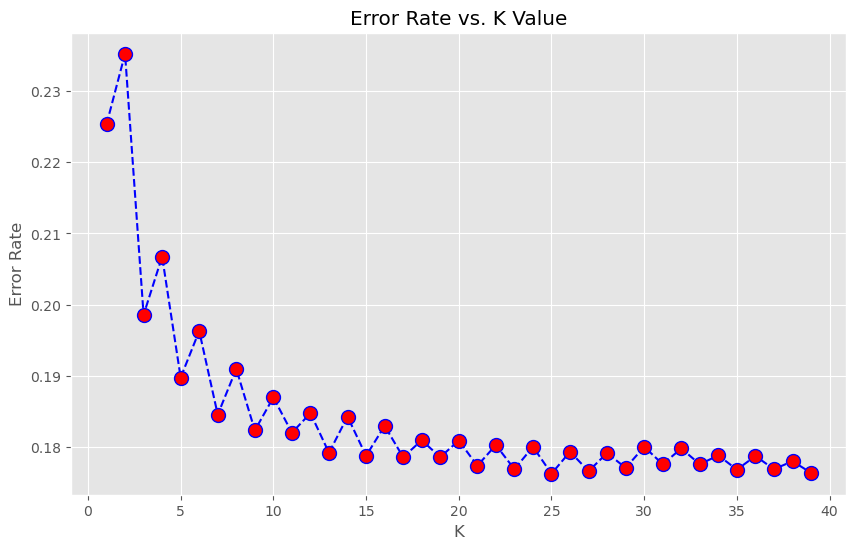

In [ ]:
# visualize error rate
visualize_err(exp_error_rate)

### using all Features

In [ ]:
features_k, features_error_rate = finding_k(scaled_X_train,y_train,scaled_X_test,y_test)

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [ ]:
print("All Features Optimal K:", features_k)

All Features Optimal K: 8


Minimum error:- 0.07168393625401442 at K = 8


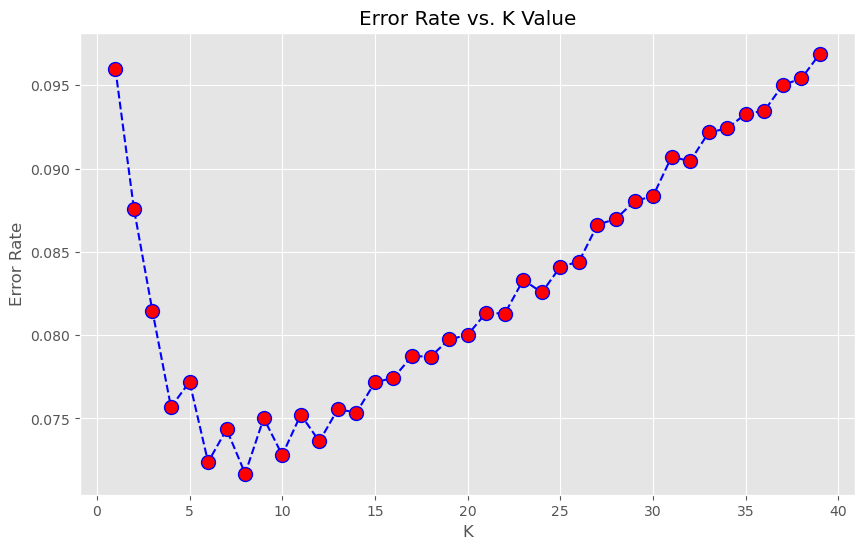

In [ ]:
# visualize error rate
visualize_err(features_error_rate)

### using RFI Expenditure Features

In [ ]:
# for expenditure rfi
exp_rfi_k, exp_rfi_error_rate = finding_k(scaled_X_train_exp_rfi,y_train_exp_rfi,scaled_X_test_exp_rfi,y_test_exp_rfi)

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [ ]:
print("RFI Expenditure Features Optimal K:", exp_rfi_k)

RFI Expenditure Features Optimal K: 7


Minimum error:- 0.1804520390232079 at K = 7


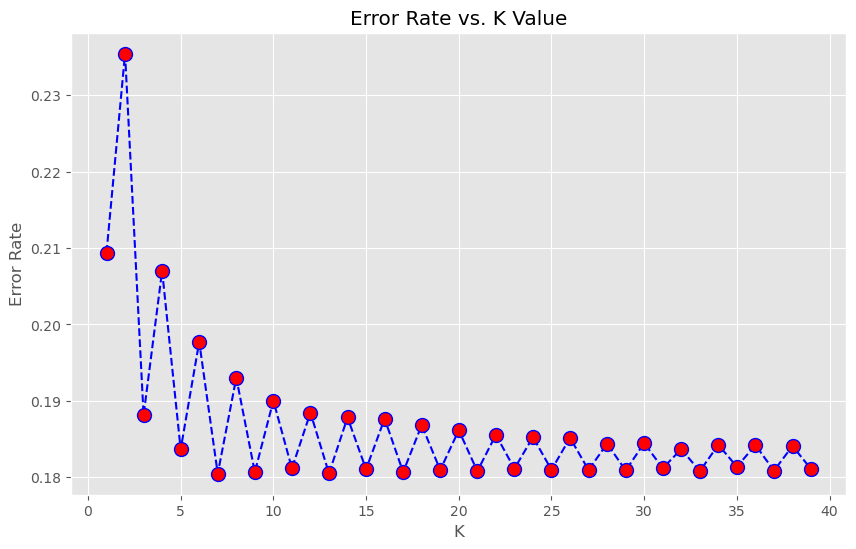

In [ ]:
# visualize error rate
visualize_err(exp_rfi_error_rate)

### using RFI Features

In [ ]:
# for expenditure rfi
rfi_k, rfi_error_rate = finding_k(scaled_X_train_rfi,y_train_rfi,scaled_X_test_rfi,y_test_rfi)

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [ ]:
print("RFI Features Optimal K:", rfi_k)

RFI Features Optimal K: 38


Minimum error:- 0.10840453250924074 at K = 38


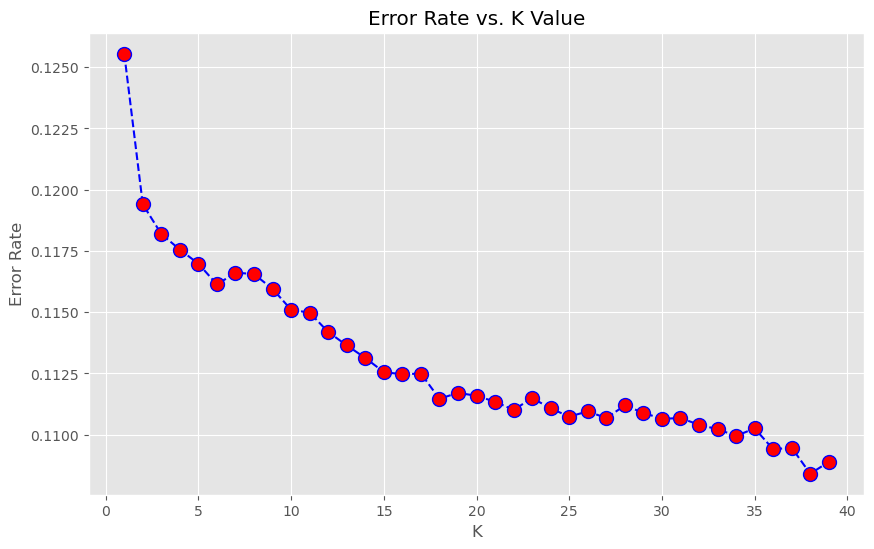

In [ ]:
# visualize error rate
visualize_err(rfi_error_rate)

## Declaration of Models to use for evaluation
the models used to predict are the following:
  1. Logistic Regression
  2. KNN
  3. SVM

## Using PCA for building model

In [ ]:
# declare a dictionary to contain all metric scores of the models per explained variance for PCA
exp_pca_model_dict = {
  0.60: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.70: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.80: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.90: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.95: {'LogReg':{}, 'KNN':{}, 'SVM':{}} 
}

pca_model_dict = {
  0.60: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.70: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.80: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.90: {'LogReg':{}, 'KNN':{}, 'SVM':{}},
  0.95: {'LogReg':{}, 'KNN':{}, 'SVM':{}} 
}

In [ ]:
# function to run the pca model with the models for income prediction 
def model_pca(v, k, pca_model_dict, df, X_train, X_test, y_train, y_test):
    explained_variance = v

    _sc = StandardScaler()
    _pca = PCA(n_components = explained_variance)

    # models used
    models = [
        ('LogReg',LogisticRegression()),
        ('KNN',KNeighborsClassifier(n_neighbors=k)),  # use optimal k value
        ('SVM',svm.SVC())
    ] 

    for name, func in models:
        pca_model = Pipeline([
            ('scale', _sc),
            ('pca', _pca),
            ('regressors', func)
        ])

        # fit the pca model with training set 
        pca_model.fit(X_train, y_train)
        y_pred = pca_model.predict(X_test)
        pca_score = pca_model.score(X_test, y_test)
        print(f'{name} Score : {pca_score}')

        # metrics
        a = accuracy_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # errors
        rmse_temp = mean_squared_error(y_test, y_pred, squared=False)
        mae_temp = mean_absolute_error(y_test, y_pred)

        # add data to pca_model_dict on the model
        pca_model_dict[v][name]['num_components'] = len(_pca.explained_variance_ratio_)
        pca_model_dict[v][name]['score'] = pca_score
        pca_model_dict[v][name]['accuracy_score'] = a
        pca_model_dict[v][name]['precision_score'] = p
        pca_model_dict[v][name]['recall_score'] = r
        pca_model_dict[v][name]['f1_score'] = f1
        pca_model_dict[v][name]['rmse'] = rmse_temp
        pca_model_dict[v][name]['mae'] = mae_temp

        # implement cross-validation
        cross_val = cross_val_score(pca_model,df,target_21, cv=5)
        print(f"{name} Crossval score: {np.mean(cross_val)}")
        pca_model_dict[v][name]['cross_val_score'] = np.mean(cross_val)

## Using RFI for building model

In [ ]:
# declare a dictionary to contain all metric scores of the models for RFI

# for rfi expenditure features only
exp_rfi_model_dict = {
    'LogReg':{},
    'KNN':{}, 
    'SVM':{}
}

# for rfi features
rfi_model_dict = {
    'LogReg':{},
    'KNN':{}, 
    'SVM':{}
}

In [ ]:
def model_rfi(k, rfi_model_dict, df, X_train, X_test, y_train, y_test):
    _sc = StandardScaler()

    # models used
    models = [
        ('LogReg',LogisticRegression()),
        ('KNN',KNeighborsClassifier(n_neighbors=k)),  # use optimal k value
        ('SVM',svm.SVC())
    ] 

    for name, func in models:
        rfi_model = Pipeline([
            ('scale', _sc),
            ('regressors', func)
        ])

        # fit the rfi model with training set 
        rfi_model.fit(X_train, y_train)
        y_pred = rfi_model.predict(X_test)
        rfi_score = rfi_model.score(X_test, y_test)
        print(f'{name} Score : {rfi_score}')

        # metrics
        a = accuracy_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # errors
        rmse_temp = mean_squared_error(y_test, y_pred, squared=False)
        mae_temp = mean_absolute_error(y_test, y_pred)

        # add data to rfi_model_dict on the model
        rfi_model_dict[name]['score'] = rfi_score
        rfi_model_dict[name]['accuracy_score'] = a
        rfi_model_dict[name]['precision_score'] = p
        rfi_model_dict[name]['recall_score'] = r
        rfi_model_dict[name]['f1_score'] = f1
        rfi_model_dict[name]['rmse'] = rmse_temp
        rfi_model_dict[name]['mae'] = mae_temp

        # implement cross-validation
        cross_val = cross_val_score(rfi_model,df,target_21, cv=5)
        print(f"{name} Crossval score: {np.mean(cross_val)}")
        rfi_model_dict[name]['cross_val_score'] = np.mean(cross_val)

## Model prediction and evaluation using Expenditure Features only
- includes model training and evaluation

### using PCA model

In [ ]:
# for 60% explained variance
model_pca(0.60, exp_k, exp_pca_model_dict, exp_df, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

LogReg Score : 0.8702660122401987
LogReg Crossval score: 0.8639390308665057


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.867448342725565


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8587944544069941
SVM Score : 0.8727807065382052
SVM Crossval score: 0.8657326366216044


In [ ]:
# for 70% explained variance
model_pca(0.70, exp_k, exp_pca_model_dict, exp_df, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

LogReg Score : 0.8712052354117433
LogReg Crossval score: 0.8647267506406932


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8656001939041387


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8572674382019372
SVM Score : 0.8739320123613888
SVM Crossval score: 0.8669203161777943


In [ ]:
# for 80% explained variance
model_pca(0.80, exp_k, exp_pca_model_dict, exp_df, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

LogReg Score : 0.8718717808883233
LogReg Crossval score: 0.866174993289427


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8635399624310731


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8538498410396762
SVM Score : 0.8742046900563534
SVM Crossval score: 0.8670778653099693


In [ ]:
# for 90% explained variance
model_pca(0.90, exp_k, exp_pca_model_dict, exp_df, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

LogReg Score : 0.8776586075259044
LogReg Crossval score: 0.8718709778502397


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8589044416166758


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8499050618598651
SVM Score : 0.877598012482579
SVM Crossval score: 0.8698470771492953


In [ ]:
# for 95% explained variance
model_pca(0.95, exp_k, exp_pca_model_dict, exp_df, X_train_exp, X_test_exp, y_train_exp, y_test_exp)

LogReg Score : 0.877810095134218
LogReg Crossval score: 0.8723012002711347


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8573592680118767


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8473358142142937
SVM Score : 0.8783857480458098
SVM Crossval score: 0.870350015825303


### Model Performance of Expenditure Features using PCA Summary 

In [ ]:
exp_pca_model_df = pd.DataFrame.from_dict(
    {(i,j): exp_pca_model_dict[i][j] 
        for i in exp_pca_model_dict.keys() 
        for j in exp_pca_model_dict[i].keys()
    }, orient='index')

In [ ]:
exp_pca_model_df

num_components     score  accuracy_score  precision_score  \
0.60 LogReg              14  0.870266        0.870266         0.888149   
     KNN                 14  0.867448        0.867448         0.889889   
     SVM                 14  0.872781        0.872781         0.898428   
0.70 LogReg              18  0.871205        0.871205         0.888272   
     KNN                 18  0.865600        0.865600         0.896885   
     SVM                 18  0.873932        0.873932         0.898575   
0.80 LogReg              23  0.871872        0.871872         0.889123   
     KNN                 23  0.863540        0.863540         0.905930   
     SVM                 23  0.874205        0.874205         0.898479   
0.90 LogReg              28  0.877659        0.877659         0.894341   
     KNN                 28  0.858904        0.858904         0.914943   
     SVM                 28  0.877598        0.877598         0.901180   
0.95 LogReg              31  0.877810        0.877810         0.894224   
     KNN                 31  0.857359        0.857359         0.919510   
     SVM                 31  0.878386        0.878386         0.901763   

             recall_score  f1_score      rmse       mae  cross_val_score  
0.60 LogReg      0.845620  0.866363  0.360186  0.129734         0.863939  
     KNN         0.837029  0.862650  0.364076  0.132552         0.858794  
     SVM         0.839040  0.867719  0.356678  0.127219         0.865733  
0.70 LogReg      0.847630  0.867475  0.358880  0.128795         0.864727  
     KNN         0.824540  0.859192  0.366606  0.134400         0.857267  
     SVM         0.841477  0.869089  0.355061  0.126068         0.866920  
0.80 LogReg      0.848117  0.868136  0.357950  0.128128         0.866175  
     KNN         0.809675  0.855102  0.369405  0.136460         0.853850  
     SVM         0.842208  0.869434  0.354676  0.125795         0.867078  
0.90 LogReg      0.855002  0.874229  0.349773  0.122341         0.871871  
     KNN         0.789692  0.847716  0.375627  0.141096         0.849905  
     SVM         0.846716  0.873100  0.349860  0.122402         0.869847  
0.95 LogReg      0.855489  0.874428  0.349557  0.122190         0.872301  
     KNN         0.781589  0.844958  0.377678  0.142641         0.847336  
     SVM         0.847813  0.873956  0.348732  0.121614         0.870350

### using RFI model

In [ ]:
# for expenditure rfi
model_rfi(exp_rfi_k, exp_rfi_model_dict, exp_bf_df, X_train_exp_rfi, X_test_exp_rfi, y_train_exp_rfi, y_test_exp_rfi)

LogReg Score : 0.868236078288796
LogReg Crossval score: 0.8633512411376767


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8556323092771011


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.8483962983395903
SVM Score : 0.8679331030721686
SVM Crossval score: 0.862999776300468


### Model Performance of Expenditure Features using RFI Summary 

In [ ]:
exp_rfi_model_df = pd.DataFrame.from_dict(
    {i: exp_rfi_model_dict[i]
        for i in exp_rfi_model_dict.keys()
    }, orient='index')

In [ ]:
exp_rfi_model_df

,score,accuracy_score,precision_score,recall_score,f1_score,rmse,mae,cross_val_score
LogReg,0.868236,0.868236,0.884996,0.844828,0.864445,0.362993,0.131764,0.863351
KNN,0.855632,0.855632,0.871959,0.831851,0.851433,0.379957,0.144368,0.848396
SVM,0.867933,0.867933,0.892645,0.834836,0.862773,0.363410,0.132067,0.863000


## Model prediction and evaluation using all Features
- includes model training and evaluation

### using PCA model

In [ ]:
# for 60% explained variance
model_pca(0.60, features_k, pca_model_dict, features_21, X_train, X_test, y_train, y_test)

LogReg Score : 0.9253772041447009
LogReg Crossval score: 0.7732097109996472


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8926861782706175


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.6537280994380725
SVM Score : 0.940071502151124
SVM Crossval score: 0.7554676133997315


In [ ]:
# for 70% explained variance
model_pca(0.70, features_k, pca_model_dict, features_21, X_train, X_test, y_train, y_test)

LogReg Score : 0.9258619644913046
LogReg Crossval score: 0.7683863018556816


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8926861782706175


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.6615206029159995
SVM Score : 0.9404350724110768
SVM Crossval score: 0.7537043433537487


In [ ]:
# for 80% explained variance
model_pca(0.80, features_k, pca_model_dict, features_21, X_train, X_test, y_train, y_test)

LogReg Score : 0.9267708901411864


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogReg Crossval score: 0.7217764283775997


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8911713021874811


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.6831045410087031
SVM Score : 0.9402229897594376
SVM Crossval score: 0.7471661501125112


In [ ]:
# for 90% explained variance
model_pca(0.90, features_k, pca_model_dict, features_21, X_train, X_test, y_train, y_test)

LogReg Score : 0.9316184936072229


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogReg Crossval score: 0.6961751132677965


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8840210870750772


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.6813108750349275
SVM Score : 0.9442525601405805
SVM Crossval score: 0.7579642672470719


In [ ]:
# for 95% explained variance
model_pca(0.95, features_k, pca_model_dict, features_21, X_train, X_test, y_train, y_test)

LogReg Score : 0.9402835848027631


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogReg Crossval score: 0.682020363771662


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.8714173180633824


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.6791355076553314
SVM Score : 0.949645518996546
SVM Crossval score: 0.7760337776471081


### Model Performance of all Features using PCA Summary 

In [ ]:
pca_model_df = pd.DataFrame.from_dict(
    {(i,j): pca_model_dict[i][j] 
        for i in pca_model_dict.keys() 
        for j in pca_model_dict[i].keys()
    }, orient='index')


In [ ]:
pca_model_df

num_components     score  accuracy_score  precision_score  \
0.60 LogReg              64  0.925377        0.925377         0.932000   
     KNN                 64  0.892686        0.892686         0.956324   
     SVM                 64  0.940072        0.940072         0.944294   
0.70 LogReg              82  0.925862        0.925862         0.931640   
     KNN                 82  0.892686        0.892686         0.956066   
     SVM                 82  0.940435        0.940435         0.945541   
0.80 LogReg             101  0.926771        0.926771         0.932193   
     KNN                101  0.891171        0.891171         0.955910   
     SVM                101  0.940223        0.940223         0.945352   
0.90 LogReg             122  0.931618        0.931618         0.935949   
     KNN                122  0.884021        0.884021         0.958807   
     SVM                122  0.944253        0.944253         0.948541   
0.95 LogReg             135  0.940284        0.940284         0.943936   
     KNN                135  0.871417        0.871417         0.960287   
     SVM                135  0.949646        0.949646         0.953405   

             recall_score  f1_score      rmse       mae  cross_val_score  
0.60 LogReg      0.916839  0.924357  0.273172  0.074623         0.773210  
     KNN         0.821738  0.883937  0.327588  0.107314         0.653728  
     SVM         0.934629  0.939437  0.244803  0.059928         0.755468  
0.70 LogReg      0.918301  0.924923  0.272283  0.074138         0.768386  
     KNN         0.821981  0.883968  0.327588  0.107314         0.661521  
     SVM         0.934020  0.939745  0.244059  0.059565         0.753704  
0.80 LogReg      0.919642  0.925875  0.270609  0.073229         0.721776  
     KNN         0.818935  0.882137  0.329892  0.108829         0.683105  
     SVM         0.933776  0.939529  0.244493  0.059777         0.747166  
0.90 LogReg      0.925856  0.930875  0.261499  0.068382         0.696175  
     KNN         0.801206  0.872951  0.340557  0.115979         0.681311  
     SVM         0.938833  0.943662  0.236109  0.055747         0.757964  
0.95 LogReg      0.935482  0.939690  0.244369  0.059716         0.682020  
     KNN         0.773425  0.856786  0.358584  0.128583         0.679136  
     SVM         0.944925  0.949146  0.224398  0.050354         0.776034

### using RFI model

In [ ]:
# for features rfi
model_rfi(rfi_k, rfi_model_dict, bf_df, X_train_rfi, X_test_rfi, y_train_rfi, y_test_rfi)

LogReg Score : 0.9697933709022601
LogReg Crossval score: 0.9676177978979148


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Score : 0.9458583287887051


C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Trixelle JT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

KNN Crossval score: 0.9398408517682117
SVM Score : 0.9731260982851603
SVM Crossval score: 0.9714716786377448


### Model Performance of Features using RFI Summary 

In [ ]:
rfi_model_df = pd.DataFrame.from_dict(
    {i: rfi_model_dict[i]
        for i in rfi_model_dict.keys()
    }, orient='index')

In [ ]:
rfi_model_df

,score,accuracy_score,precision_score,recall_score,f1_score,rmse,mae,cross_val_score
LogReg,0.969793,0.969793,0.973408,0.965639,0.969508,0.173801,0.030207,0.967618
KNN,0.945858,0.945858,0.961216,0.928598,0.944625,0.232684,0.054142,0.939841
SVM,0.973126,0.973126,0.972089,0.973925,0.973006,0.163933,0.026874,0.971472


## 2021 Dataset Exploratory Data Analysis 

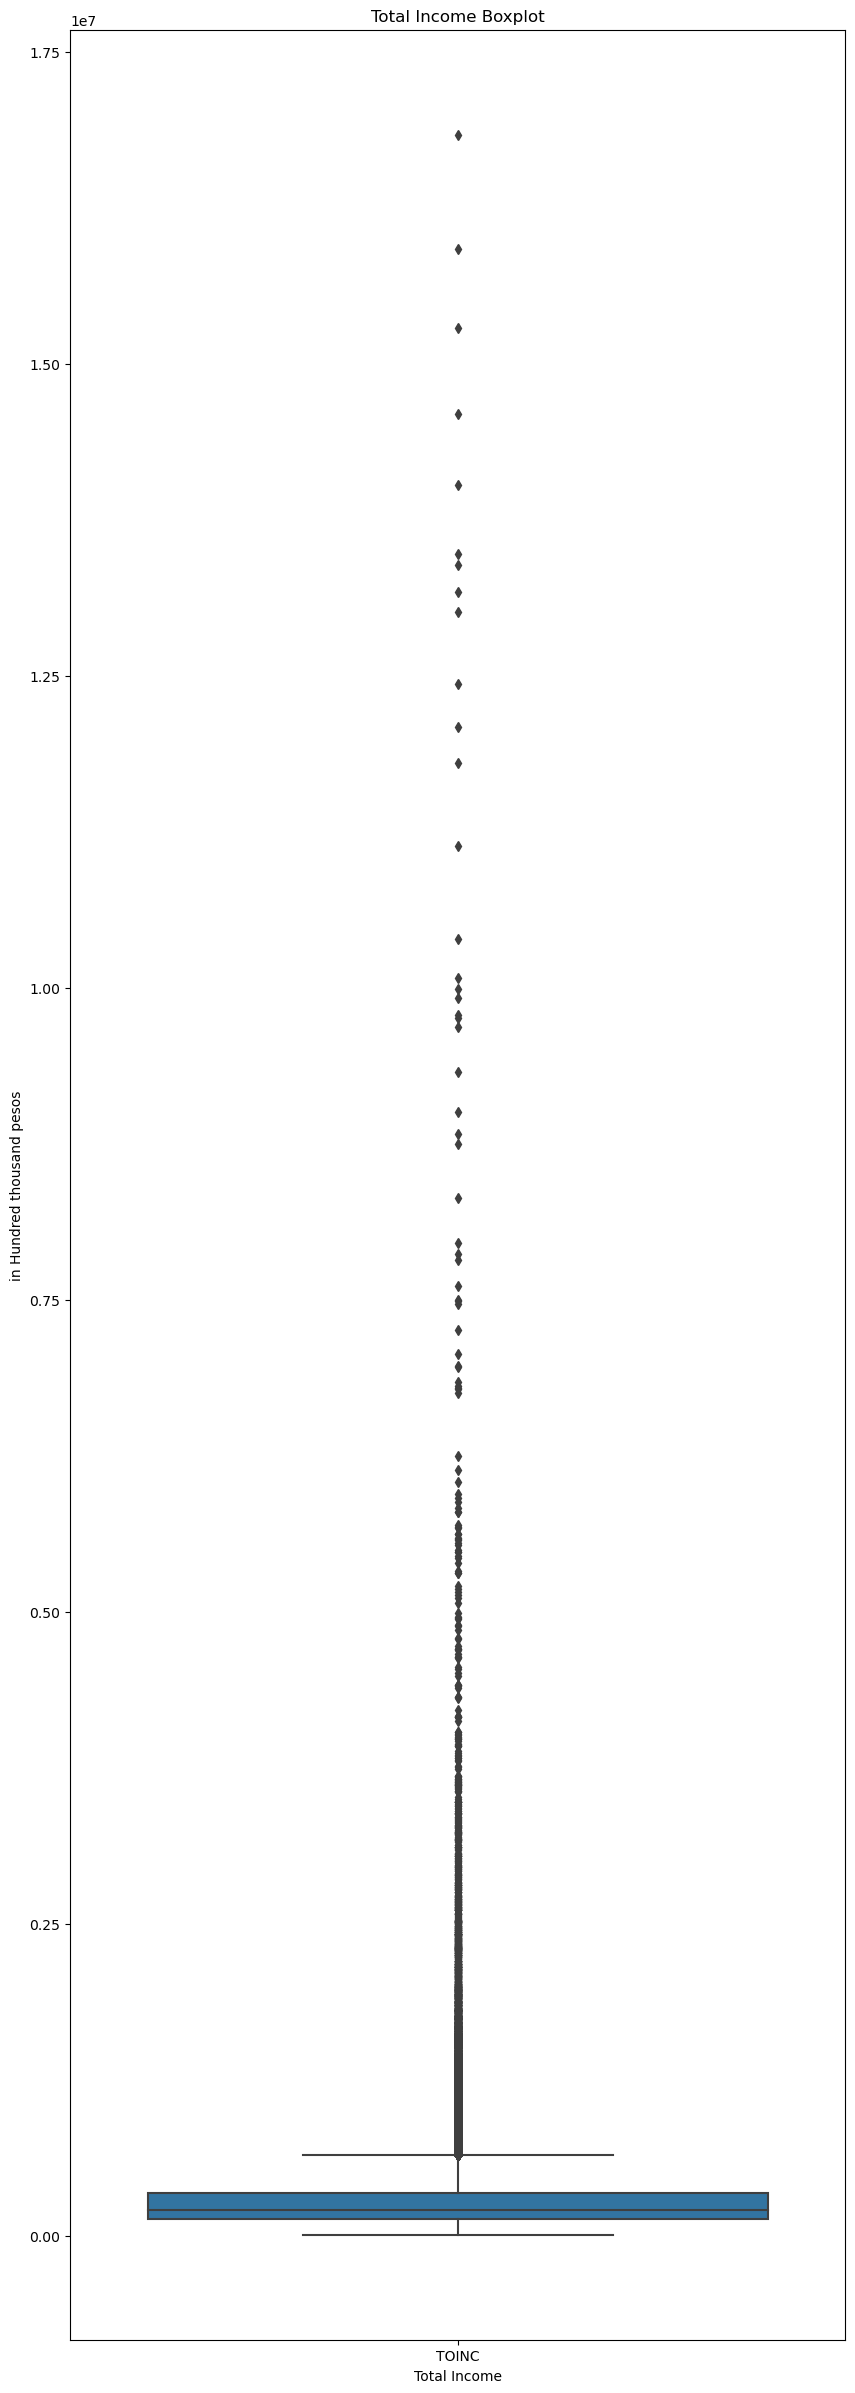

In [ ]:
# Plot the data distribution of total income in 2021 dataset using a barplot

plt.figure(figsize=(10,30))
sns.boxplot(data=df_21[["TOINC"]])
plt.title("Total Income Boxplot")
plt.xlabel("Total Income")
plt.ylabel("in Hundred thousand pesos")
plt.show()

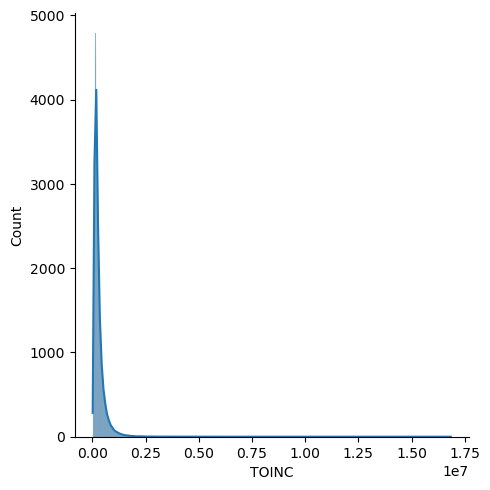

In [ ]:
# check skewness of data
sns.displot(df_21['TOINC'], kde=True)